---
# Part 1 - Results from the GS's are Analyzed 
---
- purpose of the Part 1 of thenotebook is to analyze the metrics from an initial exploratory gridsearch 
- after this largetr GS, i run a more concentrated GS with less parameters , parameters are eliminated based on the visual analysis below 
- more robust methods may be used but this works for now 

In [1]:
import pandas as pd
import pickle
import random
import numpy as np
import os
import itertools
from joblib import Parallel, delayed , parallel_backend
from collections import defaultdict
import math
import torch.nn as nn
import json
import matplotlib.pyplot as plt
import random
from Equations_Run_Combo_V_2 import *
import pickle
import copy
from Functions_Model_Processing import *


with open('/Users/cs/Desktop/LSTM_ETF_V3/short_dfs.pkl', 'rb') as f:
    loaded_dfs = pickle.load(f)
with open("/Users/cs/Desktop/LSTM_ETF_V3/lagged_cache.pkl", "rb") as f:
    lagged_cache = pickle.load(f)

from Functions_1_Initial_GS_and_Dist_Analytics_HOD import *


from Functions_Analytic_1_Initial_GS_and_Dist_Analytics_HOD import *

#/home/charifslmn/

In [2]:

# import json

# import copy

# with open('/Users/cs/Desktop/DATA_LSTM_ETF_V2/top_70_DIST_DISC_GS_21_01_to_22_12_chunk_1_32_10percentPOS_Vset_HOD.json') as f_json:
#     results_dist_disc = json.load(f_json)   # Load the JSON data



file_name = "/Users/cs/Desktop/DATA_LSTM_ETF_V2/Vset_NOTsorted_90_models_GS_22_01_to_23_12_DIST_Discovery_10percentPOS_UCO.json"

results_dist_disc = organize_dist_disc_dict(file_name)

###### T set with same seed sas val set, neeed sot be organized first

file_name_Tset = "/Users/cs/Desktop/DATA_LSTM_ETF_V2/Tset_NOTsorted_90_models_GS_22_01_to_23_12_DIST_Discovery_10percentPOS_UCO.json"

results_dist_disc_Tset_same_seeds_organized = organize_dist_disc_Tset_dict(file_name_Tset, results_dist_disc=results_dist_disc)

In [3]:
len(results_dist_disc_Tset_same_seeds_organized)

90

Models Selected models: 90
Total seeds selected models: 4946
-----
Models Data V_T: 90 90
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 1 ensembles of size 2 

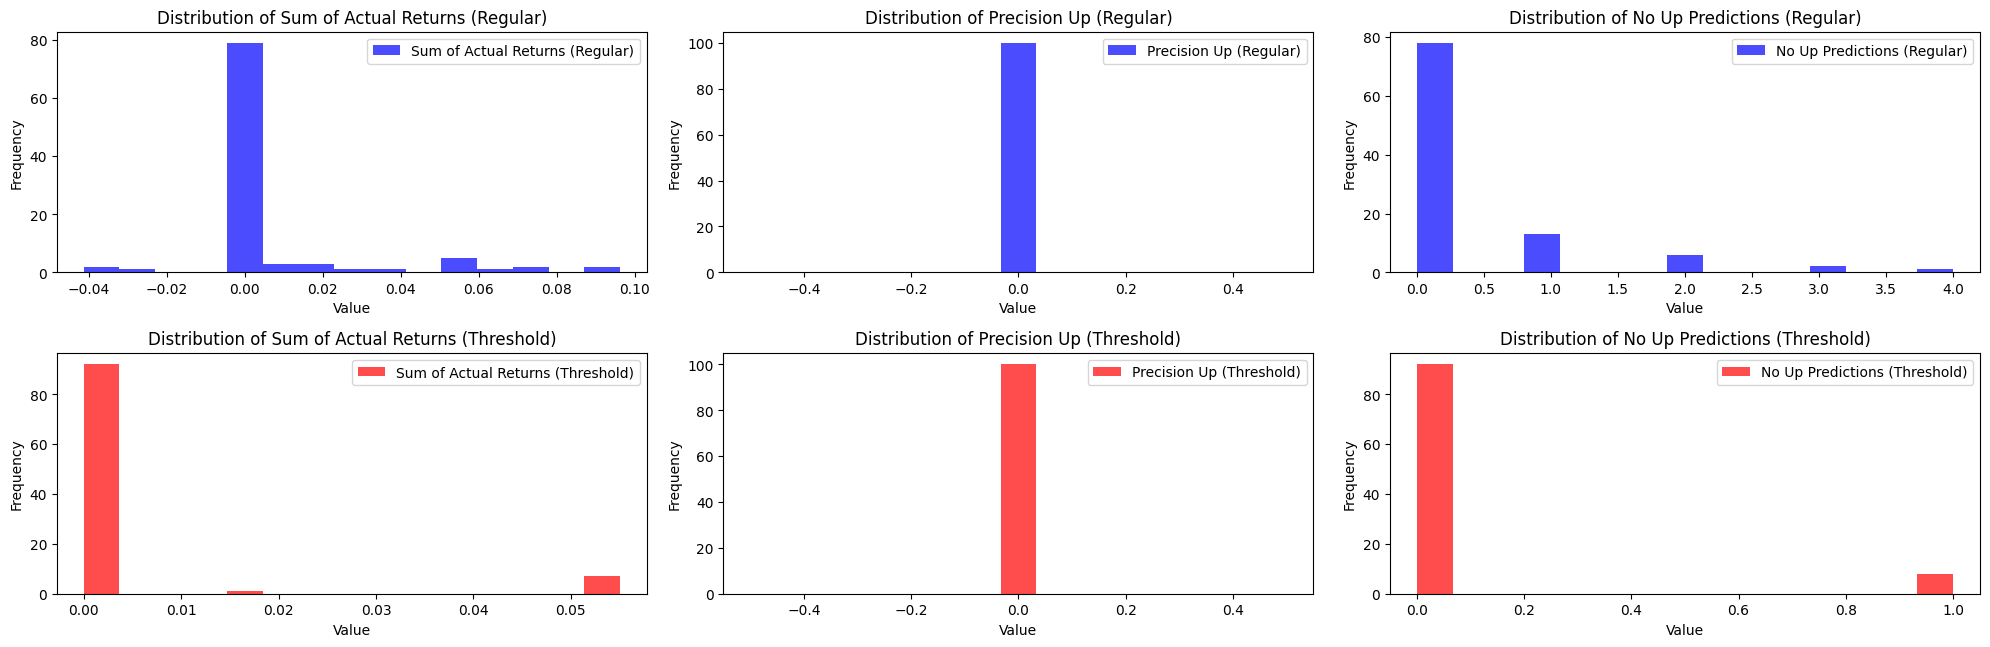


=== SUMMARY STATISTICS REGULAR ===
Precision Up - Mean: 0.00%, Std: 0.00%
Sum Returns - Mean: 0.0072, Std: 0.0226
Total Up Preds - Mean: 0.3, Std: 0.8
Unique Returns Across All Realizations: 8
Sum of Unique Returns: 0.0760

=== SUMMARY STATISTICS THRESHOLD ===
Precision Up - Mean: 0.00%, Std: 0.00%
Sum Returns - Mean: 0.0040, Std: 0.0141
Total Up Preds - Mean: 0.1, Std: 0.3
Unique Returns Across All Realizations: 2
Sum of Unique Returns: 0.0725
V_set_data length: 90
T_set_data length: 90
Master_df shape: (90, 79)

Completed 30 realizations with 2 models each
Total unique returns across all realizations: 12


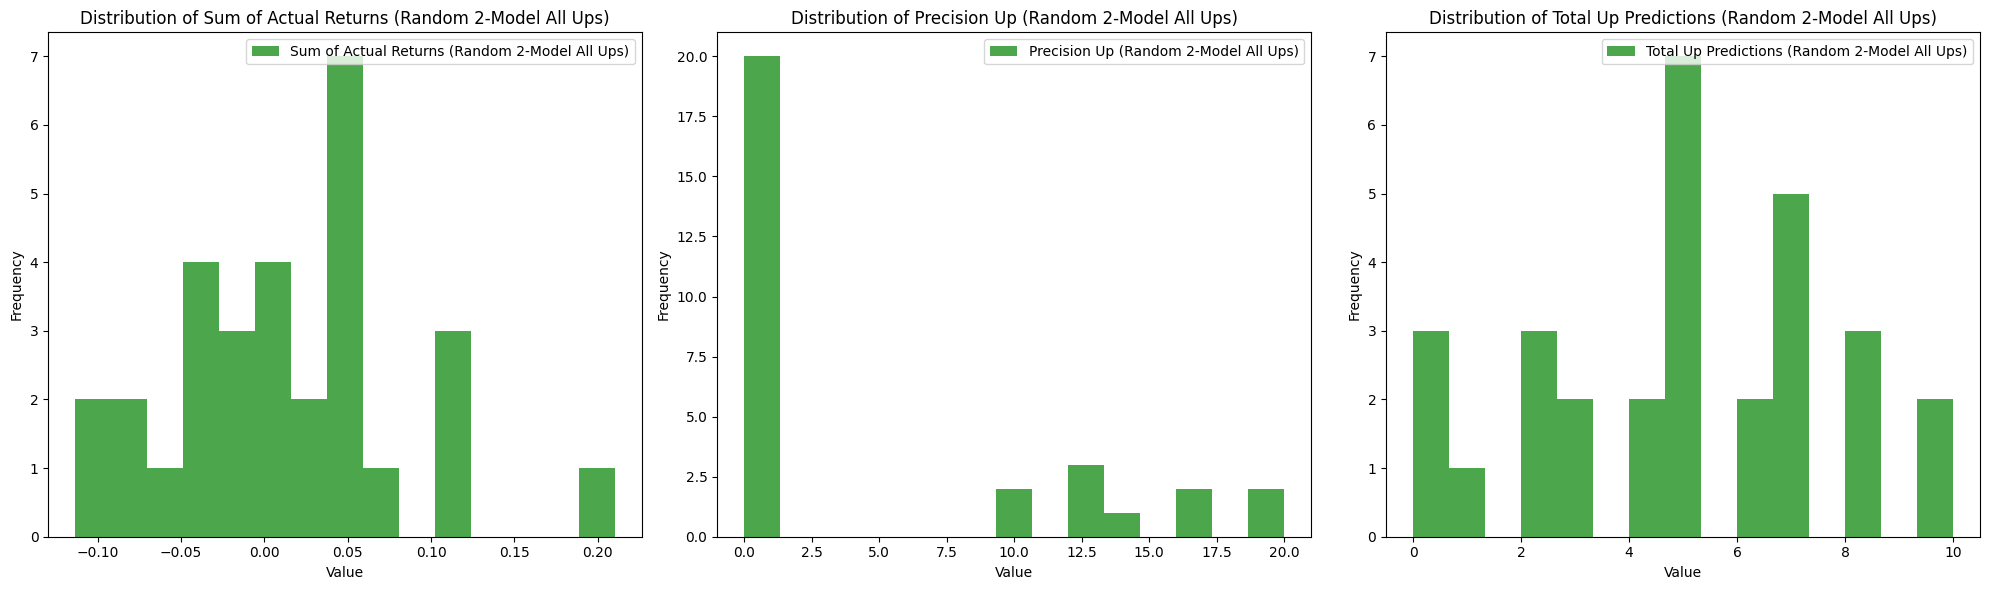


=== SUMMARY STATISTICS ===
Precision Up - Mean: 4.84%, Std: 7.13%
Sum Returns - Mean: 0.0137, Std: 0.0707
Total Up Preds - Mean: 4.9, Std: 2.7
Unique Returns Across All Realizations: 12
Sum of Unique Returns: -0.0159


In [ ]:

############ TERMINALOGY ###############
# -- "REGULAR" refers to the selective ensemble method without thresholding
# --- "THRESHOLD" refers to the selective ensemble method with thresholding
######################################

# you may experiment with different model characteristics here

######## Model Performance Preliminary Testing Analysis Across Realizations


# for each realization the algorithm here selects two seeds randomly based on correlation, applies the ensemble method and thresholding method and plots the dist of the
# postivie class predicton returns (these are the returns for the trades that the two mdoels agree on )
# this process is repeated over 100 realizations

models__param_map = {   
                             "mean_precision_range" : (5, 100),
                             "max_zero_precision_seeds" : 70,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),

                             # params ignored 
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None,

                             "use_custom_thesh_loss_Fn"   : False,
                             "use_custom_thesh_severity_loss_Fn" : False,

                               }



models__param_map_models = select_models_by_criteria(results_dist_disc, **models__param_map )



models_res_names_dict = { ## print model seleciton info , 
    "models": models__param_map_models,

}   

for k, selected_models in models_res_names_dict.items():
   print(f"Models Selected {k}: {len(selected_models)}")
   total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
   print(f"Total seeds selected {k}: {total_seeds}")
   print("-" * 5)



def run_results_realizations(use_one_realization_OUTER_2 = True , number_realizations_OUTER_2 = 1 ,number_realizations_outer_1 = 10):

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = []  

    for i in range(number_realizations_OUTER_2):
        
        ALL_models_results_across_realizations = defaultdict(lambda: defaultdict(list))

        for j in range(number_realizations_outer_1):
        
            models__param_map_models = select_models_by_criteria(results_dist_disc, **models__param_map)


            #### collect raw V and T set data for the selected models
            models__data_V_T_rawData = collect_V_T_set_FULLraw_data_TESTING(models__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized , num_models = 90, num_seeds_per_model = 1)

            #### collect raw V and T set data for the selected models
            model_based_selection_maps_raw_V_T_data = {
                "models": models__data_V_T_rawData,}

            models_data_V_T = {
                "models" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["models"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["models"]["T_set_data"]}

            }
            print("Models Data V_T:", len(models_data_V_T["models"]["V_set_data"]), len(models_data_V_T["models"]["T_set_data"]))

            model_keys = list(models_data_V_T.keys())

            for k in model_keys:

                V_set = models_data_V_T[k]["V_set_data"]
                T_set = models_data_V_T[k]["T_set_data"]
                
                output_all = process_and_RETURN_analytics_2_3_Model_Performance_TESTING(V_set, T_set, do_print=True)
                out , all_res_reg , all_res_thr = output_all[0] ,output_all[1]  , output_all[2] 

                ALL_models_results_across_realizations[k]["REG_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE"])
                ALL_models_results_across_realizations[k]["REG_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["REG_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_regular_UNIQUE"])
                
                ALL_models_results_across_realizations[k]["THR_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE"])
                ALL_models_results_across_realizations[k]["THR_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["THR_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_threshold_UNIQUE"])

                ALL_models_results_across_realizations[k]["all_res_reg"].append(all_res_reg)
                ALL_models_results_across_realizations[k]["all_res_thr"].append(all_res_thr)

 
        if not use_one_realization_OUTER_2:
            ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2.append(copy.deepcopy(dict(ALL_models_results_across_realizations)))

        if use_one_realization_OUTER_2:
            return dict(ALL_models_results_across_realizations)
        
    return ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2

ALL_models_results_across_realizations = run_results_realizations(use_one_realization_OUTER_2=True, number_realizations_OUTER_2=1, number_realizations_outer_1=1)


###################################### CONTROL ######################################

##### The version below is mean to be a control set, to test whether the ensemble and threshold methods work as intended
# the algorithm picks two models rangomly and trades all positive class prediction made , this is repeated over 30 realizations and 
# the dist is plotted

print("=" * 200)
print("=" * 200)

models__param_map_models = select_models_by_criteria(results_dist_disc, **models__param_map)
models__data_V_T_rawData = collect_V_T_set_FULLraw_data_TESTING(models__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized , num_models = 90, num_seeds_per_model = 1)

models__data_V_T_rawData_V = models__data_V_T_rawData["V_set_data"]
models__data_V_T_rawData_T = models__data_V_T_rawData["T_set_data"]


threshold = 0.9

names_all = {
    'res_mac_H_val': models__data_V_T_rawData_V,
    'res_mac_H_test': models__data_V_T_rawData_T
}

print(f"V_set_data length: {len(models__data_V_T_rawData_V)}")
print(f"T_set_data length: {len(models__data_V_T_rawData_T)}")

for data in names_all.values():
    add_threshold_metrics(data, threshold=threshold)

df_mac_H_val = flatten_results(names_all["res_mac_H_val"])
df_mac_H_test = flatten_results(names_all["res_mac_H_test"])

df_mac_H_val['H_L'] = 'H'
df_mac_H_test['H_L'] = 'H'

dfs = [df_mac_H_val, df_mac_H_test]

add_up_prediction_counts(dfs)
add_false_correct_up_stats(dfs)
flatten_metrics_columns(dfs)

master_df = process_parameters_and_merge(dfs)

print(f"Master_df shape: {master_df.shape}")




num_models = 2  
number_realizations = 30  

results = run_random_model_analysis(master_df, num_models=num_models, number_realizations=number_realizations)

Number of models with mean precision of 0: 0


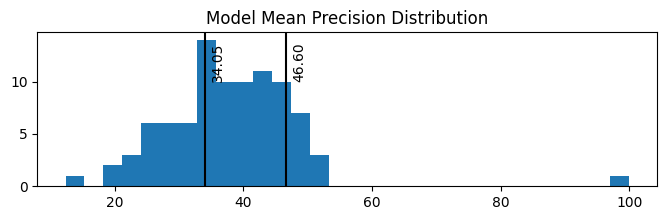

Number of models with mean recall up of 0: 0


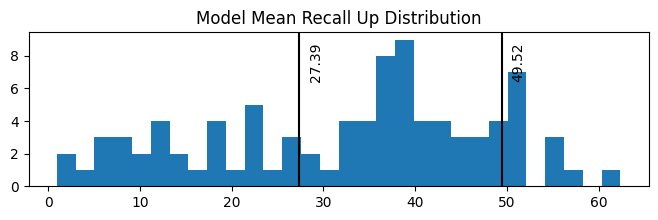

Number of models with ratio difference of 0: 1


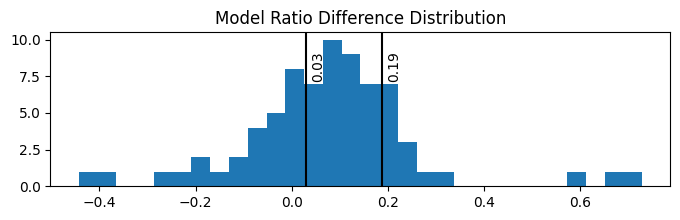

Number of models with FP Severe Ratio FPs of 0: 7


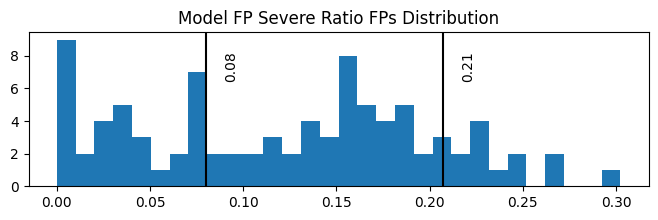

Number of models with FP Severe Ratio FPs and TPs of 0: 7


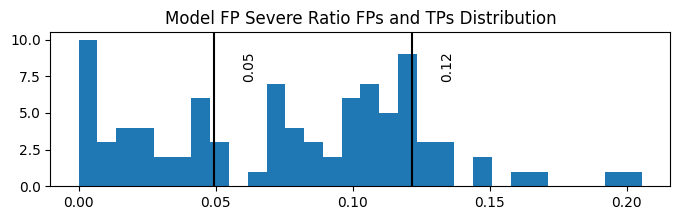

Number of seeds with precision of 0: 476


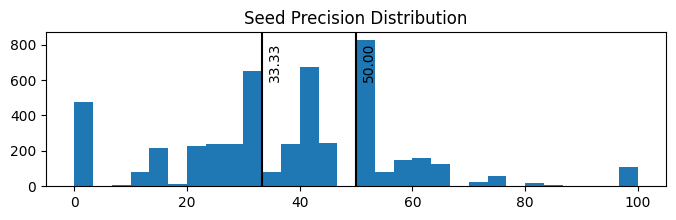

Number of seeds with recall of 0: 476


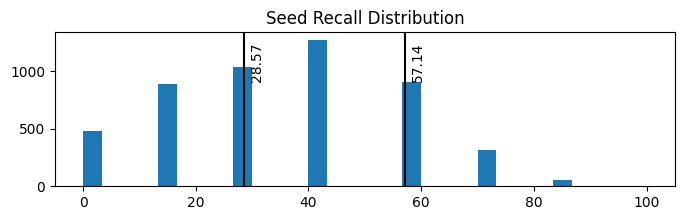

Number of seeds with TP minus FP of 0: 786


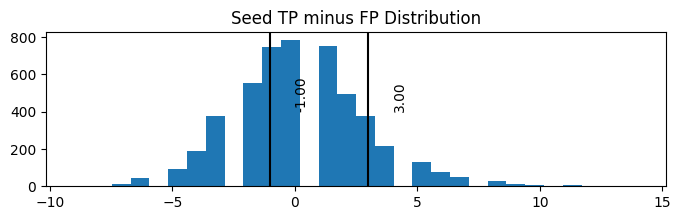

Number of seeds with severe FP high bracket of 0: 3780


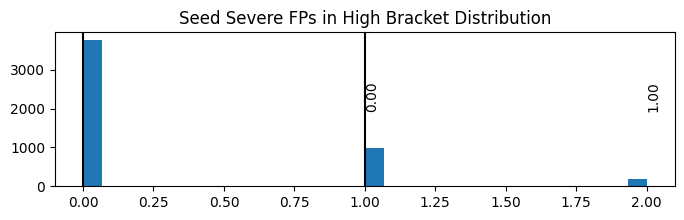

Number of seeds with TP high bracket of 0: 305


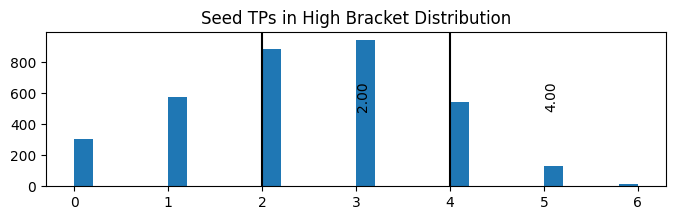

In [4]:
######             Plot the Dist for each variable metric, choose high, mid and low based on PERCENTILE RANGES
# this is better for standardizing across different data sets and time periods


selected_models = select_models_by_criteria(
    results_data=results_dist_disc,
    mean_precision_range=(0, 100),
    mean_recall_up_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(0, 100),
    min_seeds_per_model=1,
    max_models_to_return=len(results_dist_disc),  # include all; prevents sampling cap
    max_zero_precision_seeds=None,
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs=None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,
    random_seed=None,
)

###########                 MODEL METRICS DISTS

create_model_metrics_dist_plots_inital_exploration(selected_models)

In [5]:
brackets = [(0.5, 0.6), (0.6, 0.65), (0.65, 0.7), (0.7, 0.75), 
            (0.75, 0.8), (0.8, 0.85), (0.85, 0.9), (0.9, 0.95), (0.95, 1)]

metrics = ["precision_up", "recall_up", "accuracy"]


# ---- collect per-model data and compute precision_up mean for ordering ----
model_summaries = []  # (prec_mean, combo_idx, collected_dict, parameters, per_seed)

for model in results_dist_disc:
    combo_idx = model["combo_index"]
    parameters = model["combo"]
    per_seed = model["per_seed_all_results"]

    collected = {k: [] for k in metrics}
    for run in per_seed:
        om = run["result_entry"]["cv_sets"]["overall_metrics"]
        for k in metrics:
            v = om[k]
            try:
                collected[k].append(float(v))
            except (TypeError, ValueError):
                collected[k].append(None)

    vals_prec = [x for x in collected["precision_up"] if isinstance(x, (int, float)) and not (isinstance(x, float) and math.isnan(x))]
    prec_mean = float(np.mean(vals_prec)) if vals_prec else float("nan")


    model_summaries.append((prec_mean, combo_idx, collected, parameters, per_seed))

# sort as before
model_summaries.sort(key=lambda t: (-t[0]) if not math.isnan(t[0]) else float("inf"))




##############################

model_summaries_Tset_same_seeds = []  # (prec_mean, combo_idx, collected_dict, parameters, per_seed)

for model in results_dist_disc_Tset_same_seeds_organized:
    combo_idx = model["combo_index"]
    parameters = model["combo"]
    per_seed = model["per_seed_all_results"]

    collected = {k: [] for k in metrics}
    for run in per_seed:
        om = run["result_entry"]["cv_sets"]["overall_metrics"]
        for k in metrics:
            v = om[k]
            try:
                collected[k].append(float(v))
            except (TypeError, ValueError):
                collected[k].append(None)

    vals_prec = [x for x in collected["precision_up"] if isinstance(x, (int, float)) and not (isinstance(x, float) and math.isnan(x))]
    prec_mean = float(np.mean(vals_prec)) if vals_prec else float("nan")

    # ⬇️ add per_seed in the tuple
    model_summaries_Tset_same_seeds.append((prec_mean, combo_idx, collected, parameters, per_seed))

# sort as before
model_summaries_Tset_same_seeds.sort(key=lambda t: (-t[0]) if not math.isnan(t[0]) else float("inf"))




{'binary_0_1_cutoff_ret_rate_percentage': 0.1, 'learning_rate': 0.05, 'num_epochs': 300, 'batch_size': 70, 'use_bidirectional': False, 'lag': 6, 'input_size': 12, 'hidden_size': 35, 'num_layers': 6, 'use_monthly_dfs_only': True, 'use_binary_0_1_retRate': False, 'use_custom_loss_function_BCE_THRESH': False, 'use_custom_loss_function_BCE_THRESH_AND_SEVERITY': False, 'use_LOW_weights_for_BCE_custom_loss': True, 'pred_threshold_sigmoid01_up': None, 'use_binary_neg1_1': False, 'use_ret_rate': False, 'use_print_acc': False, 'use_dropout': False, 'use_class_weighting': False, 'is_deterministic': True, 'seed_num': 60607, 'use_existing_lagged_data': True, 'use_dynamic_weights': False, 'use_binary_0_1_retRate_custom_neg': False, 'use_binary_0_1_retRate_custom_pos': True, 'POS_weight_multiplier': 1.3, 'use_rolling_fixed_train_size': False, 'use_existing_initial_weights': False, 'state_dict': None, 'use_USO_wticoncat_predictor_WEEKLY_END_MO': False, 'use_UCO_wticoncat_predictor_WEEKLY_END_MO': Tru

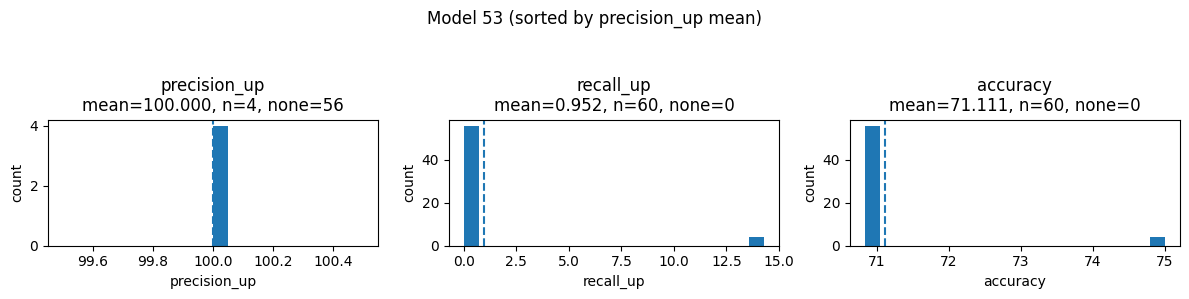

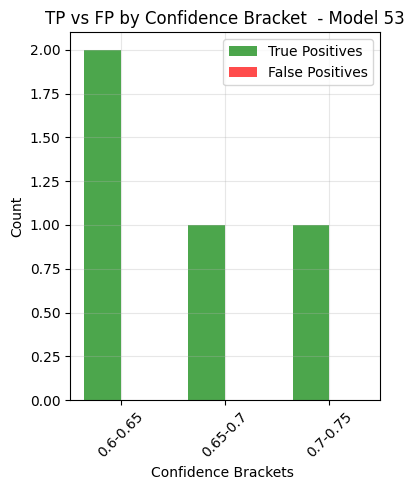

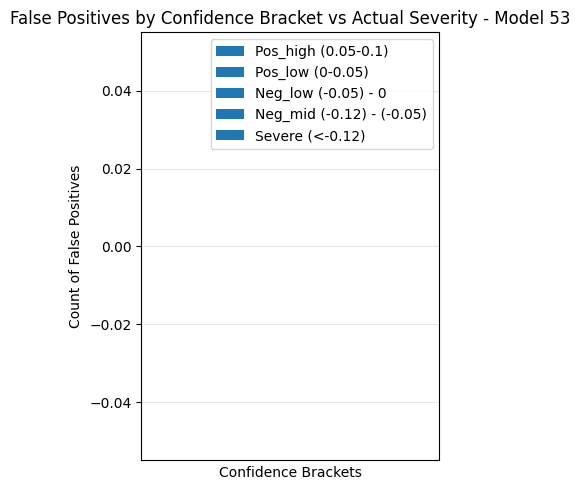

Severe Case Proportions by Confidence Bracket:
--------------------------------------------------
Severity Counts by Confidence Bracket:
--------------------------------------------------


In [6]:


LENGTH = 1
# ---- plot in the sorted order ----
for prec_mean, combo_idx, collected, parameters, per_seed in model_summaries[:LENGTH]:
    fig, axes = plt.subplots(1, len(metrics), figsize=(12, 3), squeeze=False)
    axes = axes[0]

    print(parameters)

    for ax, k in zip(axes, metrics):
        vals = [x for x in collected[k] if isinstance(x, (int, float)) and not (isinstance(x, float) and math.isnan(x))]
        none_cnt = len(collected[k]) - len(vals)

        if vals:
            mean_val = float(np.mean(vals))
            ax.hist(vals, bins=20)
            ax.axvline(mean_val, linestyle="--")
            ax.set_xlabel(k)
            ax.set_ylabel("count")
            ax.set_title(f"{k}\nmean={mean_val:.3f}, n={len(vals)}, none={none_cnt}")
        else:
            ax.text(0.5, 0.5, f"No data\nnone={none_cnt}", ha="center", va="center")
            ax.set_xticks([]); ax.set_yticks([]); ax.set_title(k)

    fig.suptitle(f"Model {combo_idx} (sorted by precision_up mean)", fontsize=12)
    fig.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()

    # =================== NEW: per-model correlation-threshold + severity plots ===================

    # Recycle your functions by making a "top-like" list from this model's seeds
    # Each item: (score_unused, entry=result_entry)
    top_like_for_this_model = [(0.0, run["result_entry"]) for run in per_seed]

    # Correlation / confidence bracket plot for THIS model
    TP_FP_brackets_analysis(top_like_for_this_model, brackets, f"Model {combo_idx}")

    # Severity plot for THIS model
    TP_FP_brackets_severity_analysis(top_like_for_this_model, brackets, f"Model {combo_idx}")


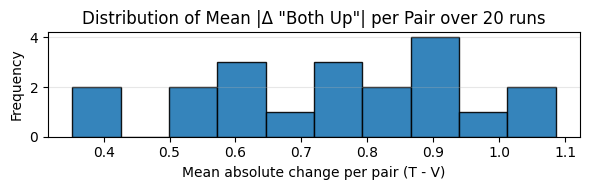

Runs: 20 | Valid: 20 | NaNs: 0
Mean=0.740 | Median=0.767 | Std=0.203 | Min=0.352 | Max=1.086


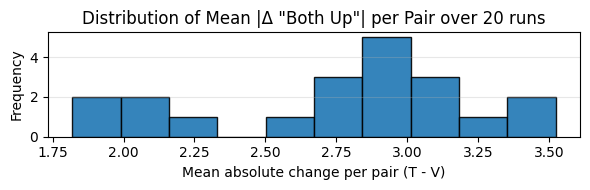

Runs: 20 | Valid: 20 | NaNs: 0
Mean=2.757 | Median=2.852 | Std=0.483 | Min=1.819 | Max=3.524


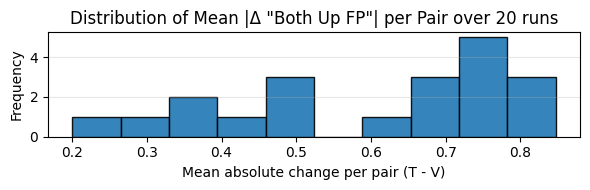

Runs: 20 | Valid: 20 | NaNs: 0
Mean=0.599 | Median=0.667 | Std=0.186 | Min=0.200 | Max=0.848


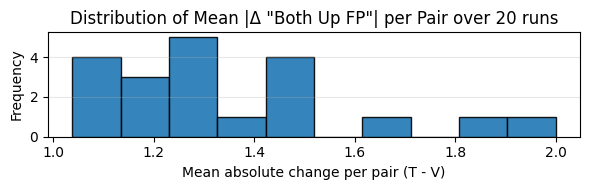

Runs: 20 | Valid: 20 | NaNs: 0
Mean=1.360 | Median=1.281 | Std=0.247 | Min=1.038 | Max=2.000


In [7]:
# Import required functions and modules
from Functions_Model_Processing import *
from Functions_Analytic_1_Initial_GS_and_Dist_Analytics_HOD import *
from Functions_1_Initial_GS_and_Dist_Analytics_HOD import select_models_by_criteria

# ===== Simplified version: both-up and both-up-FP analysis =====
# Function definitions moved to Functions_Analytic_1_Initial_GS_and_Dist_Analytics_HOD.py

import copy
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# -------------------------------------------------------------------------------------------------
# Example criteria (unchanged)
# -------------------------------------------------------------------------------------------------
RR_1_low_recall = {
    "mean_precision_range": (5, 100), "max_zero_precision_seeds": 70,
    "mean_recall_up_range": (0, 30), "seed_recall_range": (0, 30),
    "seed_precision_range": (0, 100), "min_seeds_per_model": 1,
    "max_models_to_return": 90, "random_seed": None
}

RR_2_high_recall = {
    "mean_precision_range": (5, 100), "max_zero_precision_seeds": 70,
    "mean_recall_up_range": (30, 100), "seed_recall_range": (30, 100),
    "seed_precision_range": (0, 100), "min_seeds_per_model": 1,
    "max_models_to_return": 90, "random_seed": None
}

# ---- Run experiments (produces 4 plots total) ----

diffs_bothup_RR1 = run_experiment(
    model_selection_map=RR_1_low_recall, 
    results_dist_disc=results_dist_disc,
    results_dist_disc_Tset_same_seeds_organized=results_dist_disc_Tset_same_seeds_organized,
    select_models_by_criteria=select_models_by_criteria,
    metric_type="both_up"
)
diffs_bothup_RR2 = run_experiment(
    model_selection_map=RR_2_high_recall, 
    results_dist_disc=results_dist_disc,
    results_dist_disc_Tset_same_seeds_organized=results_dist_disc_Tset_same_seeds_organized,
    select_models_by_criteria=select_models_by_criteria,
    metric_type="both_up"
)

diffs_fp_RR1 = run_experiment(
    model_selection_map=RR_1_low_recall, 
    results_dist_disc=results_dist_disc,
    results_dist_disc_Tset_same_seeds_organized=results_dist_disc_Tset_same_seeds_organized,
    select_models_by_criteria=select_models_by_criteria,
    metric_type="both_up_fp"
)
diffs_fp_RR2 = run_experiment(
    model_selection_map=RR_2_high_recall, 
    results_dist_disc=results_dist_disc,
    results_dist_disc_Tset_same_seeds_organized=results_dist_disc_Tset_same_seeds_organized,
    select_models_by_criteria=select_models_by_criteria,
    metric_type="both_up_fp"
)

=== PLOTTING FP/TP RATIOS FOR RR_1_low_recall ===


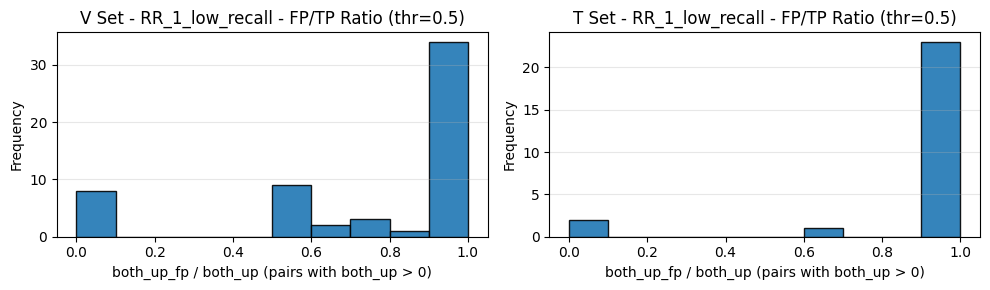

=== PLOTTING SEVERE FP RATIOS FOR RR_1_low_recall ===


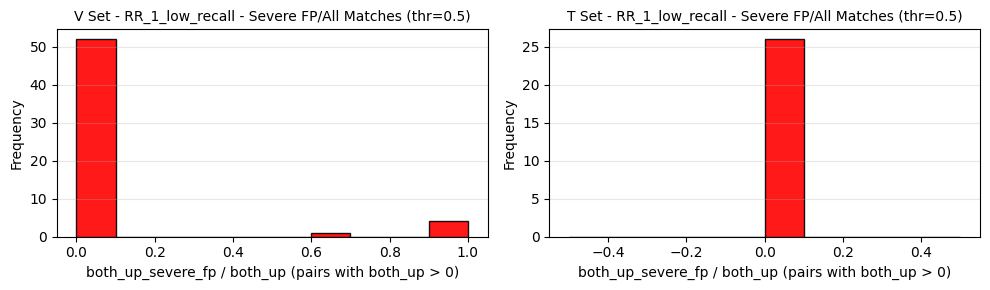

=== PLOTTING FP/TP RATIOS FOR RR_2_high_recall ===


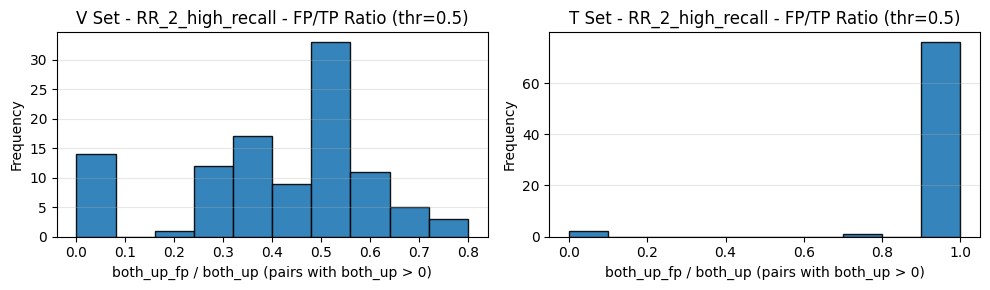

=== PLOTTING SEVERE FP RATIOS FOR RR_2_high_recall ===


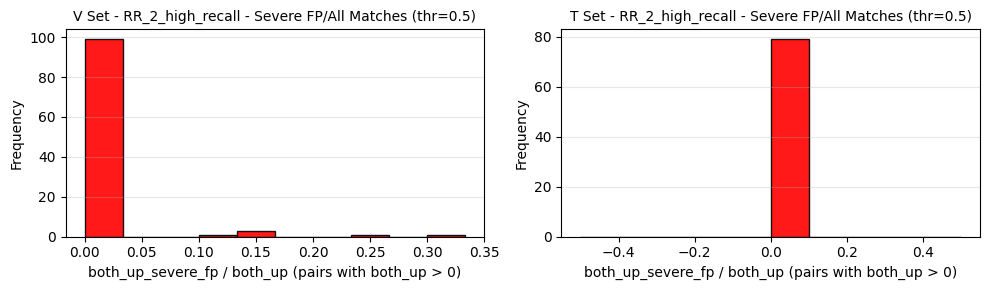

=== PLOTTING FP/TP RATIOS FOR RR_3_low_recall_sev_loss ===


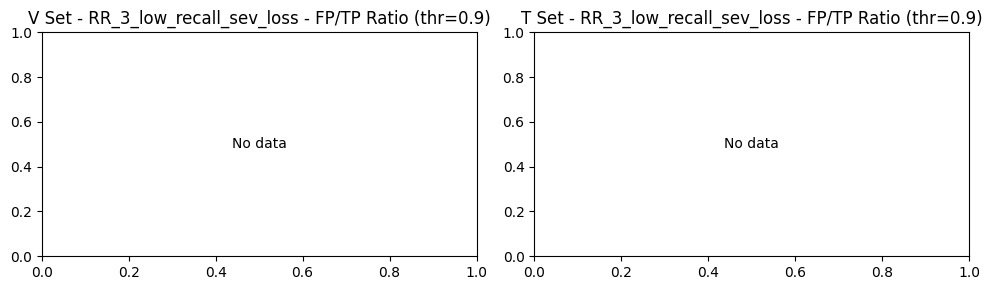

=== PLOTTING SEVERE FP RATIOS FOR RR_3_low_recall_sev_loss ===


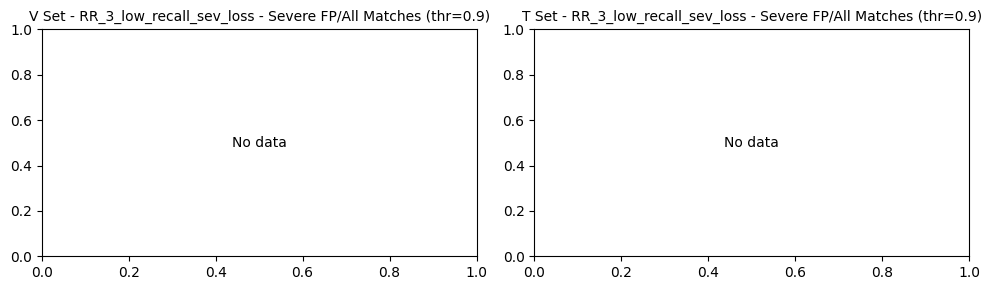

=== PLOTTING FP/TP RATIOS FOR RR_4_high_recall_sev_loss ===


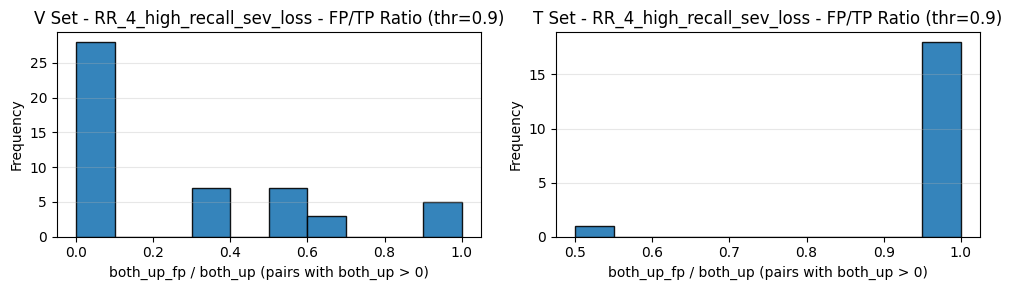

=== PLOTTING SEVERE FP RATIOS FOR RR_4_high_recall_sev_loss ===


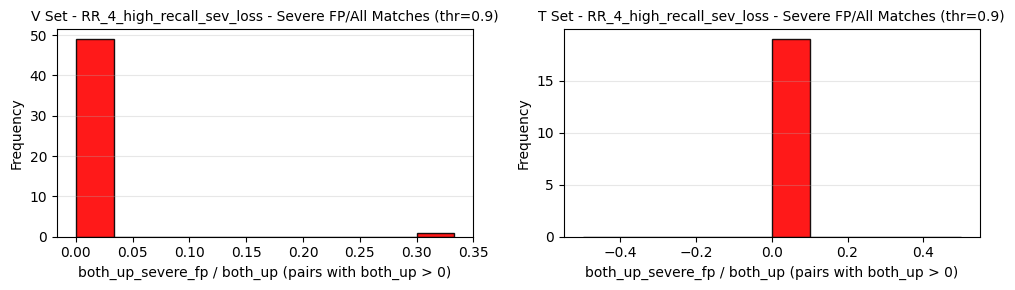

In [8]:
# ===== One-cell script: add "both-up FP" analysis alongside existing "both-up" analysis =====
# Produces 4 plots total when you run both RR_1 and RR_2 with both runners.
# Function definitions moved to Functions_Analytic_1_Initial_GS_and_Dist_Analytics_HOD.py

import copy
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import spearmanr

# Your utilities (already in your project)
from Functions_Model_Processing import (
    add_threshold_metrics,
    flatten_results,
    add_up_prediction_counts,
    add_false_correct_up_stats,
    flatten_metrics_columns,
    process_parameters_and_merge,
)

# Import select_models_by_criteria
from Functions_1_Initial_GS_and_Dist_Analytics_HOD import select_models_by_criteria

# -------------------------------------------------------------------------------------------------
# Example criteria (unchanged)
# -------------------------------------------------------------------------------------------------
RR_1_low_recall = {
    "mean_precision_range": (5, 100), "max_zero_precision_seeds": 70,
    "mean_recall_up_range": (0, 30), "seed_recall_range": (0, 40),
    "seed_precision_range": (0, 100), "min_seeds_per_model": 1,
    "max_models_to_return": 90, "random_seed": None
}

RR_2_high_recall = {
    "mean_precision_range": (5, 100), "max_zero_precision_seeds": 70,
    "mean_recall_up_range": (30, 100), "seed_recall_range": (30, 100),
    "seed_precision_range": (0, 100), "min_seeds_per_model": 1,
    "max_models_to_return": 90, "random_seed": None
}

RR_3_low_recall_sev_loss = {
    "mean_precision_range": (5, 100), "max_zero_precision_seeds": 70,
    "mean_recall_up_range": (0, 30), "seed_recall_range": (0, 40),
    "seed_precision_range": (0, 100), "min_seeds_per_model": 1,
    "max_models_to_return": 90, "random_seed": None,
    "use_custom_thesh_severity_loss_Fn": True,
}

RR_4_high_recall_sev_loss = {
    "mean_precision_range": (5, 100), "max_zero_precision_seeds": 70,
    "mean_recall_up_range": (30, 100), "seed_recall_range": (30, 100),
    "seed_precision_range": (0, 100), "min_seeds_per_model": 1,
    "max_models_to_return": 90, "random_seed": None,
    "use_custom_thesh_severity_loss_Fn": True,
}


run_single_ratio_plot_enhanced(
    model_selection_map=RR_1_low_recall, 
    results_dist_disc=results_dist_disc,
    results_dist_disc_Tset_same_seeds_organized=results_dist_disc_Tset_same_seeds_organized,
    select_models_by_criteria=select_models_by_criteria,
    pred_threshold=0.5, 
    model_name="RR_1_low_recall"
)
run_single_ratio_plot_enhanced(
    model_selection_map=RR_2_high_recall, 
    results_dist_disc=results_dist_disc,
    results_dist_disc_Tset_same_seeds_organized=results_dist_disc_Tset_same_seeds_organized,
    select_models_by_criteria=select_models_by_criteria,
    pred_threshold=0.5, 
    model_name="RR_2_high_recall"
)


run_single_ratio_plot_enhanced(
    model_selection_map=RR_3_low_recall_sev_loss, 
    results_dist_disc=results_dist_disc,
    results_dist_disc_Tset_same_seeds_organized=results_dist_disc_Tset_same_seeds_organized,
    select_models_by_criteria=select_models_by_criteria,
    pred_threshold=0.9, 
    model_name="RR_3_low_recall_sev_loss"
)
run_single_ratio_plot_enhanced(
    model_selection_map=RR_4_high_recall_sev_loss, 
    results_dist_disc=results_dist_disc,
    results_dist_disc_Tset_same_seeds_organized=results_dist_disc_Tset_same_seeds_organized,
    select_models_by_criteria=select_models_by_criteria,
    pred_threshold=0.9, 
    model_name="RR_4_high_recall_sev_loss"
)

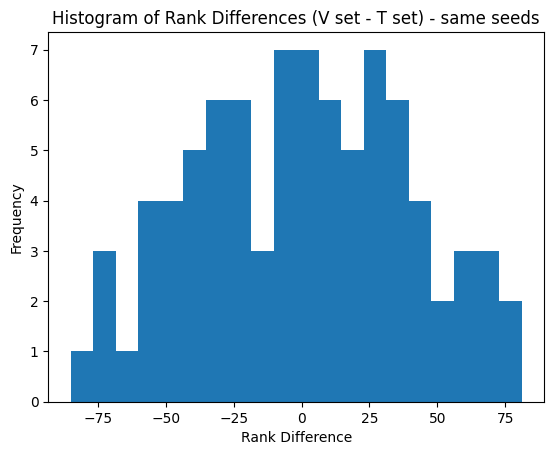

87

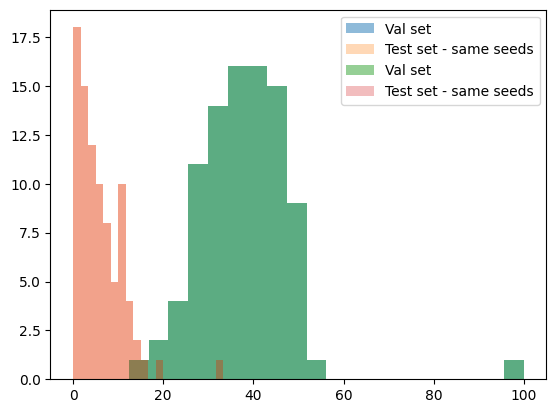

In [9]:



model_summaries_combo_idxs = [t[1] for t in model_summaries]
model_summaries_combo_idxs_Tset_same_seeds = [t[1] for t in model_summaries_Tset_same_seeds]

model_summaries_mean_V = [i[0] for i in model_summaries]
model_summaries_mean_T_same_seeds = [i[0] for i in model_summaries_Tset_same_seeds]


# for i , j in zip(model_summaries_combo_idxs_Tset, model_summaries_combo_idxs):
#  print(i , j)

###################################### with same seeds

list_ranks_coupled_V_T_same_seeds = []
for rank , (T_idx , V_idx , T_mean , V_mean) in enumerate(zip( model_summaries_combo_idxs_Tset_same_seeds, model_summaries_combo_idxs , model_summaries_mean_T_same_seeds , model_summaries_mean_V )):
    if not (np.isfinite(T_mean) and np.isfinite(V_mean)):
        continue
    dic = {"rank_V" : rank , "combo_idx_val_V" : V_idx , "rank_T" : rank , "combo_idx_val_T" : T_idx  , "mean_V" : V_mean , "mean_T" : T_mean  }
    list_ranks_coupled_V_T_same_seeds.append(dic)


for out in list_ranks_coupled_V_T_same_seeds:
    matched = False
    for inner in list_ranks_coupled_V_T_same_seeds:
        if out["combo_idx_val_V"] == inner["combo_idx_val_T"]:
            out["rank_diff"] = inner["rank_T"] - out["rank_V"]
            out["mean_diff"] = inner["mean_T"] - out["mean_V"]
            out["new_mean_T"] = inner["mean_T"]
            matched = True
            break  # found the pair; no need to keep scanning
    if not matched:
        # no counterpart found → set safe defaults to avoid KeyError later
        out["rank_diff"] = np.nan
        out["mean_diff"] = np.nan
        out["new_mean_T"] = np.nan

rank_diffs = [i["rank_diff"] for i in list_ranks_coupled_V_T_same_seeds]
mean_diffs = [i["mean_diff"] for i in list_ranks_coupled_V_T_same_seeds]


plt.hist(rank_diffs , bins=20)
plt.title("Histogram of Rank Differences (V set - T set) - same seeds")
plt.xlabel("Rank Difference")
plt.ylabel("Frequency")
plt.show()

plt.hist(model_summaries_mean_V , bins=20 , alpha = 0.5 , label = "Val set")
plt.hist(model_summaries_mean_T_same_seeds , bins=20 , alpha = 0.3 , label = "Test set - same seeds")
plt.legend()

#### 

plt.hist(model_summaries_mean_V , bins=20 , alpha = 0.5 , label = "Val set")
plt.hist(model_summaries_mean_T_same_seeds , bins=20 , alpha = 0.3 , label = "Test set - same seeds")
plt.legend()

len(list_ranks_coupled_V_T_same_seeds)




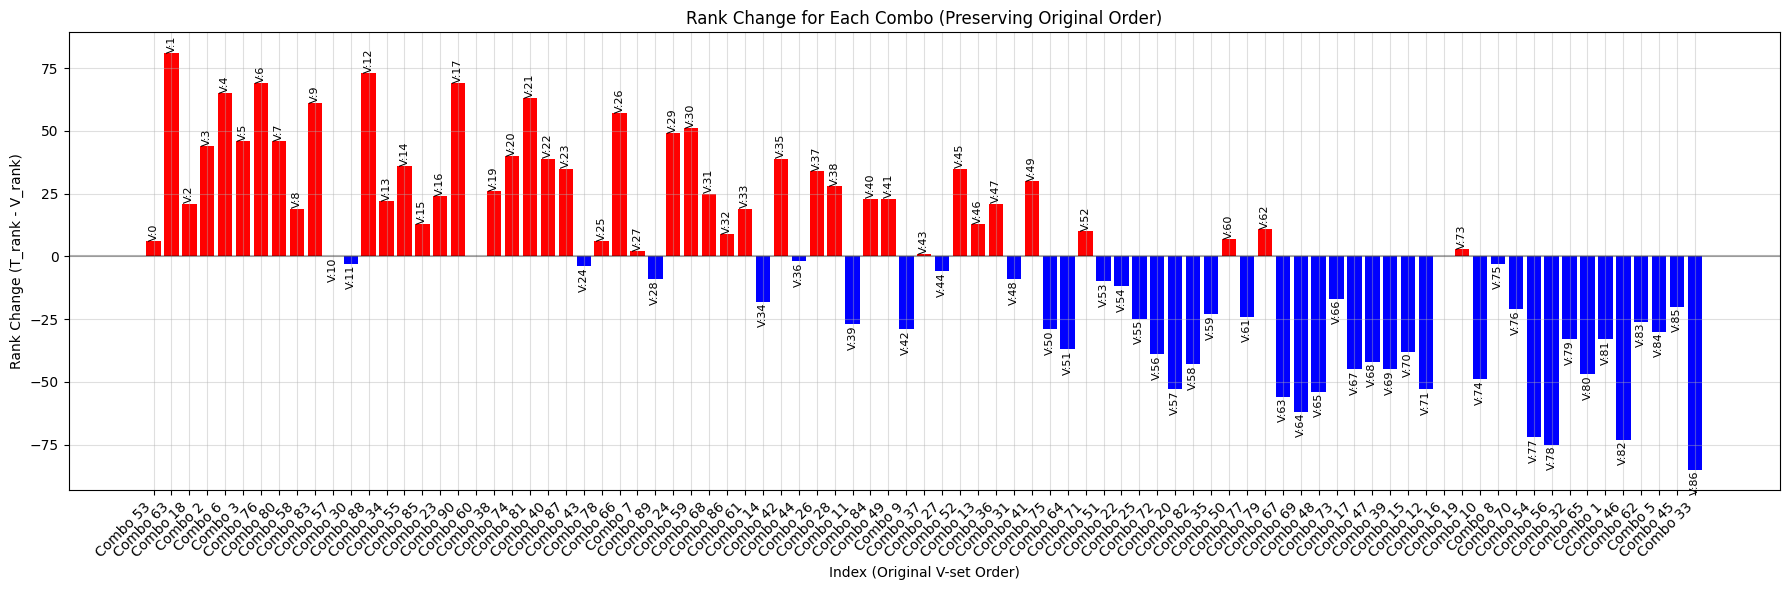

In [10]:
# Use the list_ranks_coupled in the order it was created (same as V set order)
combos = [f"Combo {item['combo_idx_val_V']}" for item in list_ranks_coupled_V_T_same_seeds]
changes = [item["rank_diff"] for item in list_ranks_coupled_V_T_same_seeds]
v_ranks = [item["rank_V"] for item in list_ranks_coupled_V_T_same_seeds]


plt.figure(figsize=(18, 6))
bars = plt.bar(range(len(combos)), changes, 
               color=np.where(np.array(changes) > 0, 'red', 'blue'))

plt.xlabel('Index (Original V-set Order)')
plt.ylabel('Rank Change (T_rank - V_rank)')
plt.title('Rank Change for Each Combo (Preserving Original Order)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add V rank labels for reference
for i, (bar, v_rank) in enumerate(zip(bars, v_ranks)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.1 if bar.get_height() > 0 else -0.4), 
             f'V:{v_rank}', ha='center', va='bottom' if bar.get_height() > 0 else 'top', 
             fontsize=8, rotation=90)
plt.grid(True , alpha=0.4)
plt.xticks(range(len(combos)), combos, rotation=45, ha='right')
plt.tight_layout()
plt.show()

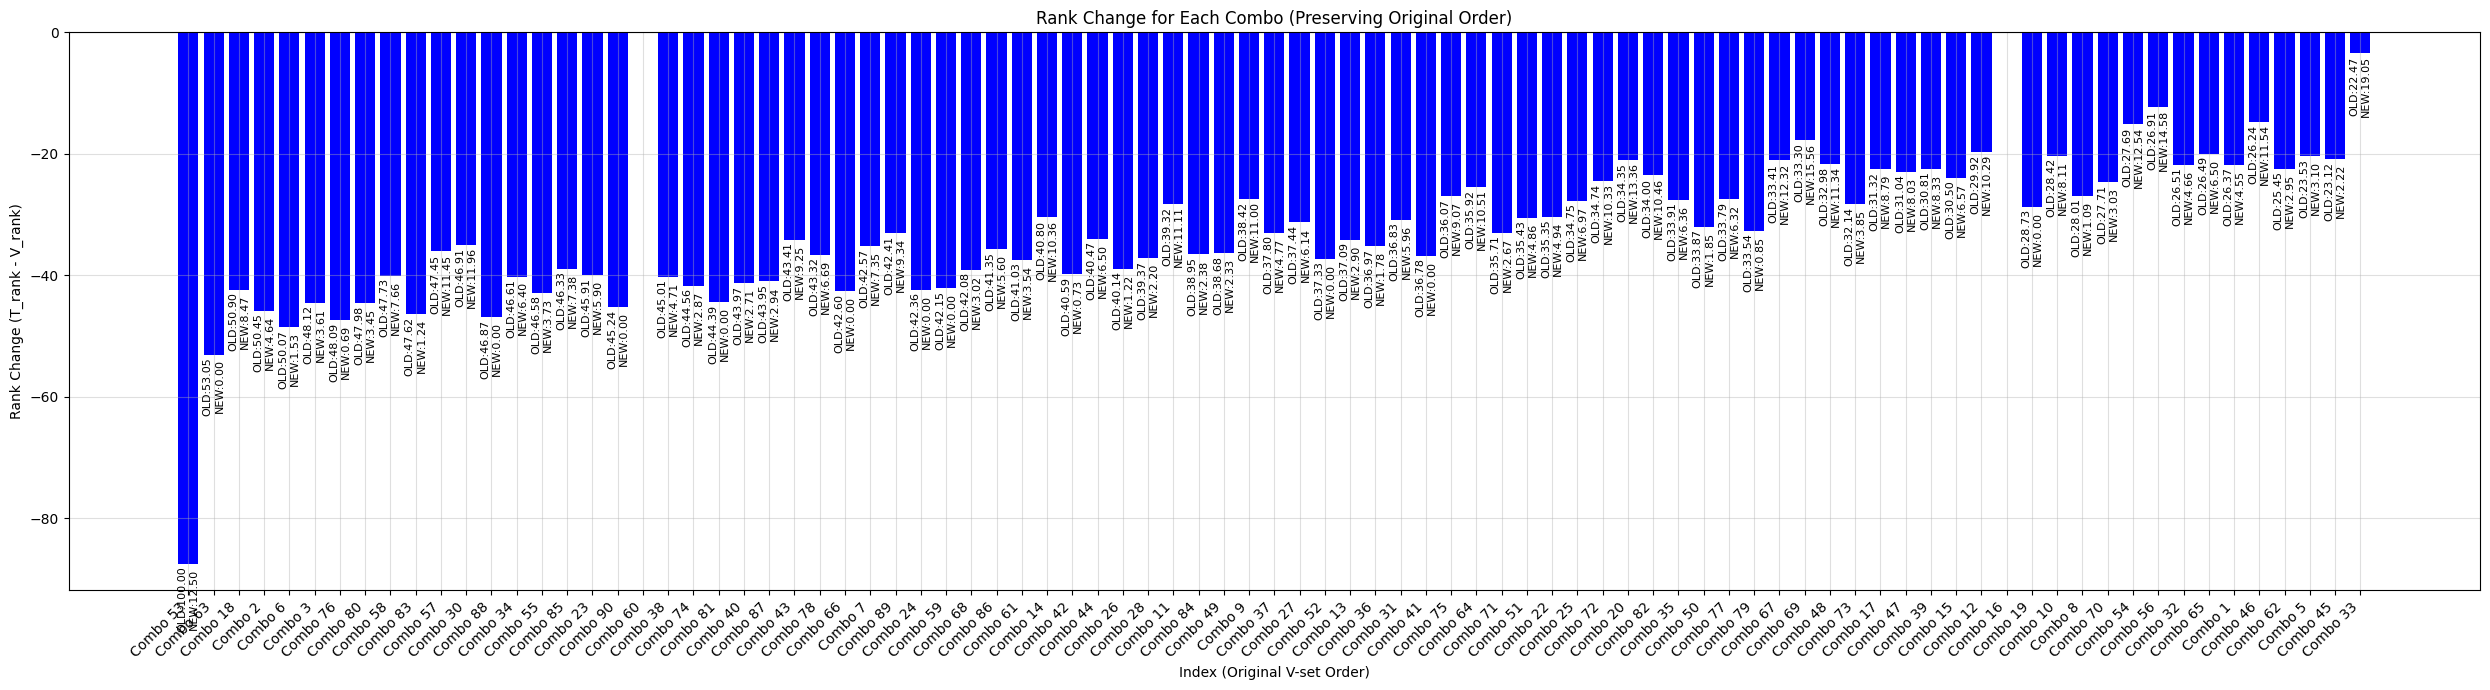

In [11]:
# Use the list_ranks_coupled in the order it was created (same as V set order)
combos = [f"Combo {item['combo_idx_val_V']}" for item in list_ranks_coupled_V_T_same_seeds]
changes = [item["mean_diff"] for item in list_ranks_coupled_V_T_same_seeds]
v_ranks = [item["rank_V"] for item in list_ranks_coupled_V_T_same_seeds]
v_mean = [item["mean_V"] for item in list_ranks_coupled_V_T_same_seeds]
v_new_mean = [item["new_mean_T"] for item in list_ranks_coupled_V_T_same_seeds]

plt.figure(figsize=(25, 7))
bars = plt.bar(range(len(combos)), changes, 
               color=np.where(np.array(changes) > 0, 'red', 'blue'))

plt.xlabel('Index (Original V-set Order)')
plt.ylabel('Rank Change (T_rank - V_rank)')
plt.title('Rank Change for Each Combo (Preserving Original Order)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add V rank labels for reference
for i, (bar, v_rank, v_mean_val, v_new_mean_val) in enumerate(zip(bars, v_ranks , v_mean , v_new_mean)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.1 if bar.get_height() > 0 else -0.4), 
             f'OLD:{v_mean_val:.2f}\nNEW:{v_new_mean_val:.2f}', ha='center', va='bottom' if bar.get_height() > 0 else 'top', 
             fontsize=8, rotation=90)
plt.grid(True , alpha=0.4)
plt.xticks(range(len(combos)), combos, rotation=45, ha='right')
plt.tight_layout()
plt.show()

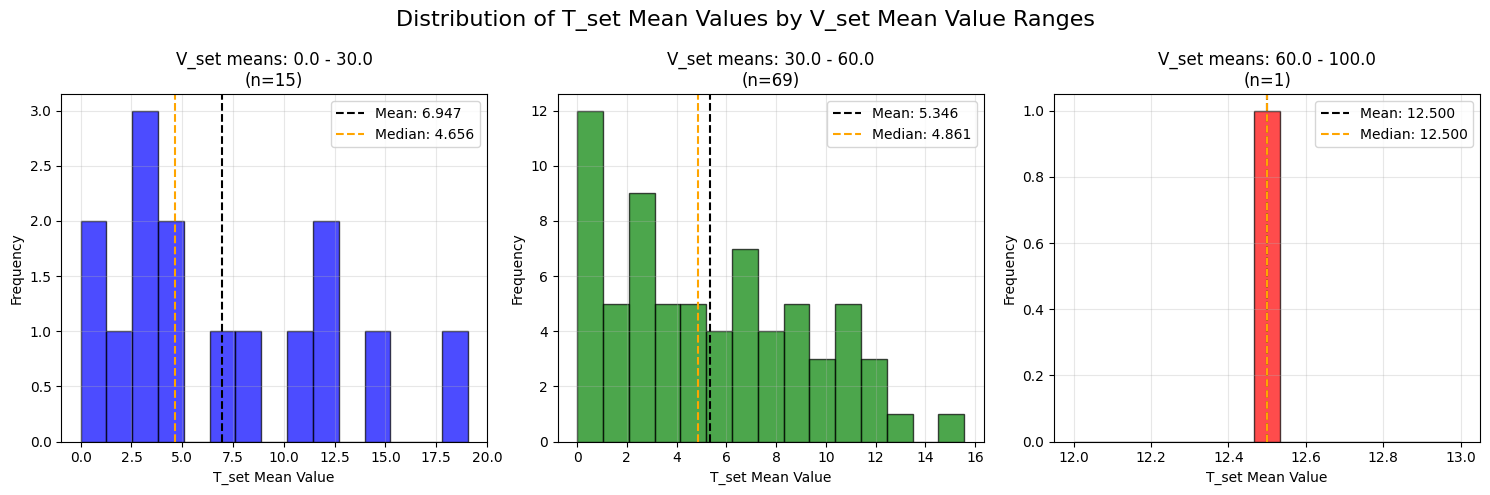

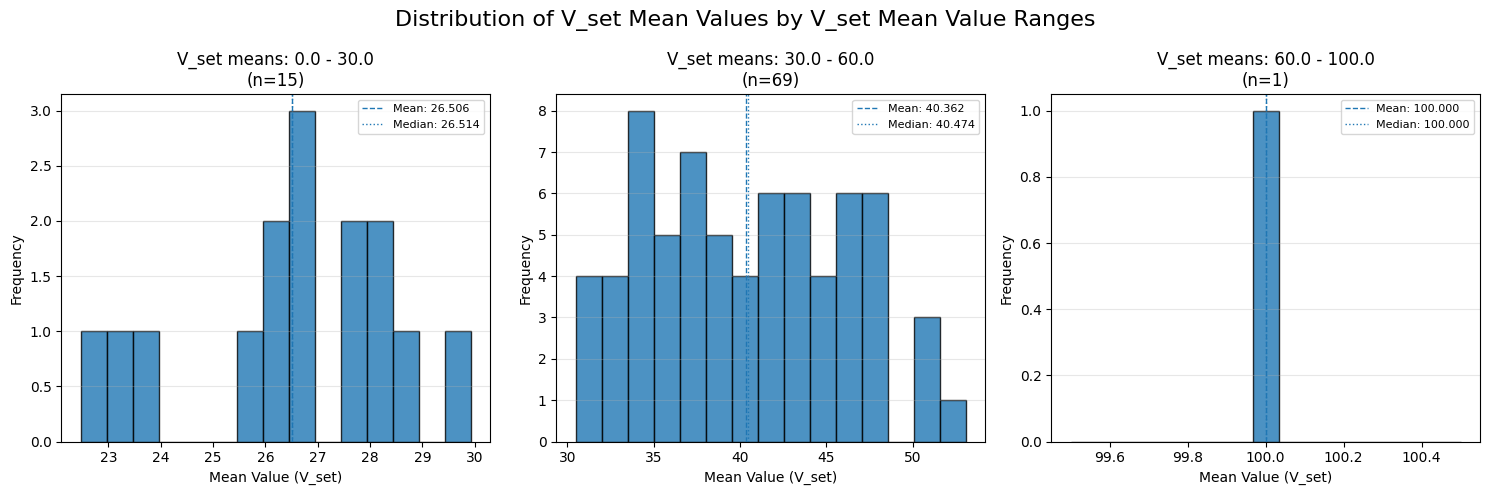

/var/folders/g_/x6nnyyc96zb627gqxngw5wgc0000gn/T/ipykernel_41057/4021639131.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_T_set_means, labels=all_labels)


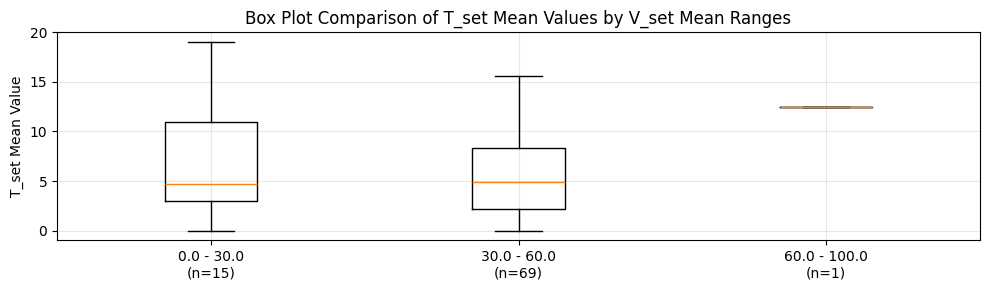

In [12]:

####*#**#*#*# Sanity check for functions below --- keep 


import numpy as np
import matplotlib.pyplot as plt

# Extract & sanitize inputs
V_set = np.asarray(v_mean, dtype=float)
T_set = np.asarray(v_new_mean, dtype=float)

# 1) Drop NaN/Inf in lockstep (keep only pairs where both are finite)
valid = np.isfinite(V_set) & np.isfinite(T_set)
V_set = V_set[valid]
T_set = T_set[valid]

# Define the ranges
ranges = [(0, 30), (30, 60), (60, 100)]
range_labels = ['0.0 - 30.0', '30.0 - 60.0', '60.0 - 100.0']
colors = ['blue', 'green', 'red']  # optional




# ----------------- Figure 1: T-set distributions per V_set-mean range -----------------
plt.figure(figsize=(15, 5))
for i, (range_val, label, color) in enumerate(zip(ranges, range_labels, colors)):
    L, H = range_val
    mask = (V_set >= L) & (V_set < H) if i < len(ranges) - 1 else (V_set >= L) & (V_set <= H)

    T_set_r = T_set[mask]

    plt.subplot(1, 3, i + 1)
    if T_set_r.size > 0:
        plt.hist(T_set_r, bins=15, alpha=0.7, color=color, edgecolor='black')
        mean_v = float(np.mean(T_set_r))
        med_v  = float(np.median(T_set_r))
        plt.axvline(mean_v, color='black', linestyle='--', label=f'Mean: {mean_v:.3f}')
        plt.axvline(med_v,  color='orange', linestyle='--', label=f'Median: {med_v:.3f}')
        plt.title(f'V_set means: {label}\n(n={T_set_r.size})')
        plt.xlabel('T_set Mean Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, f'No data in range\n{label}',
                 ha='center', va='center', transform=plt.gca().transAxes)
        plt.title(f'V_set means: {label}')

plt.suptitle('Distribution of T_set Mean Values by V_set Mean Value Ranges', fontsize=16)
plt.tight_layout()
plt.show()

# ----------------- Figure 2: V_set distributions per V_set-mean range -----------------
plt.figure(figsize=(15, 5))
for i, (range_val, label, color) in enumerate(zip(ranges, range_labels, colors)):
    L, H = range_val
    mask = (V_set >= L) & (V_set < H) if i < len(ranges) - 1 else (V_set >= L) & (V_set <= H)

    V_set_r = V_set[mask]

    plt.subplot(1, 3, i + 1)
    if V_set_r.size > 0:
        plt.hist(V_set_r, bins=15, alpha=0.8, edgecolor='black')
        mean_V_set = float(np.mean(V_set_r))
        med_V_set  = float(np.median(V_set_r))
        plt.axvline(mean_V_set, linestyle='--', linewidth=1, label=f'Mean: {mean_V_set:.3f}')
        plt.axvline(med_V_set,  linestyle=':',  linewidth=1, label=f'Median: {med_V_set:.3f}')
        plt.title(f'V_set means: {label}\n(n={V_set_r.size})')
        plt.xlabel('Mean Value (V_set)')
        plt.ylabel('Frequency')
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3, axis='y')
    else:
        plt.text(0.5, 0.5, f'No data in range\n{label}',
                 ha='center', va='center', transform=plt.gca().transAxes)
        plt.title(f'V_set means: {label}')

plt.suptitle('Distribution of V_set Mean Values by V_set Mean Value Ranges', fontsize=16)
plt.tight_layout()
plt.show()

# ----------------- Figure 3: Box plot of T_set by V_set-mean ranges -----------------
plt.figure(figsize=(10, 3))
all_T_set_means = []
all_labels = []

for i, (range_val, label) in enumerate(zip(ranges, range_labels)):
    L, H = range_val
    mask = (V_set >= L) & (V_set < H) if i < len(ranges) - 1 else (V_set >= L) & (V_set <= H)

    T_set_r = T_set[mask]
    if T_set_r.size > 0:
        all_T_set_means.append(T_set_r)
        all_labels.append(f'{label}\n(n={T_set_r.size})')

if all_T_set_means:
    plt.boxplot(all_T_set_means, labels=all_labels)
    plt.title('Box Plot Comparison of T_set Mean Values by V_set Mean Ranges')
    plt.ylabel('T_set Mean Value')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No non-empty ranges for boxplot.")






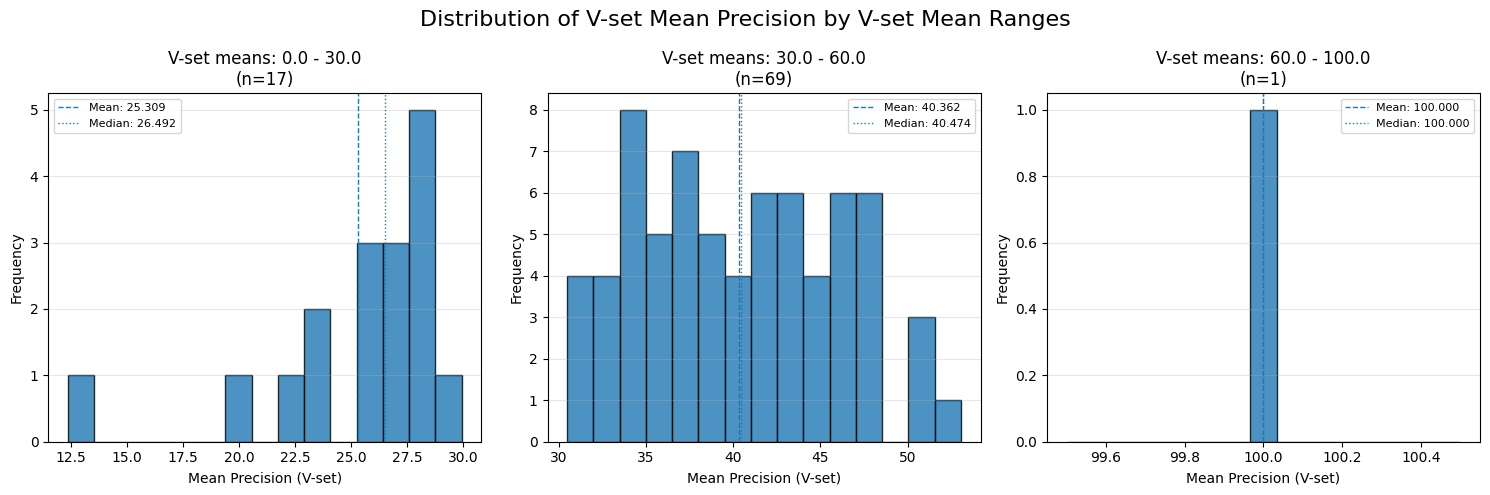

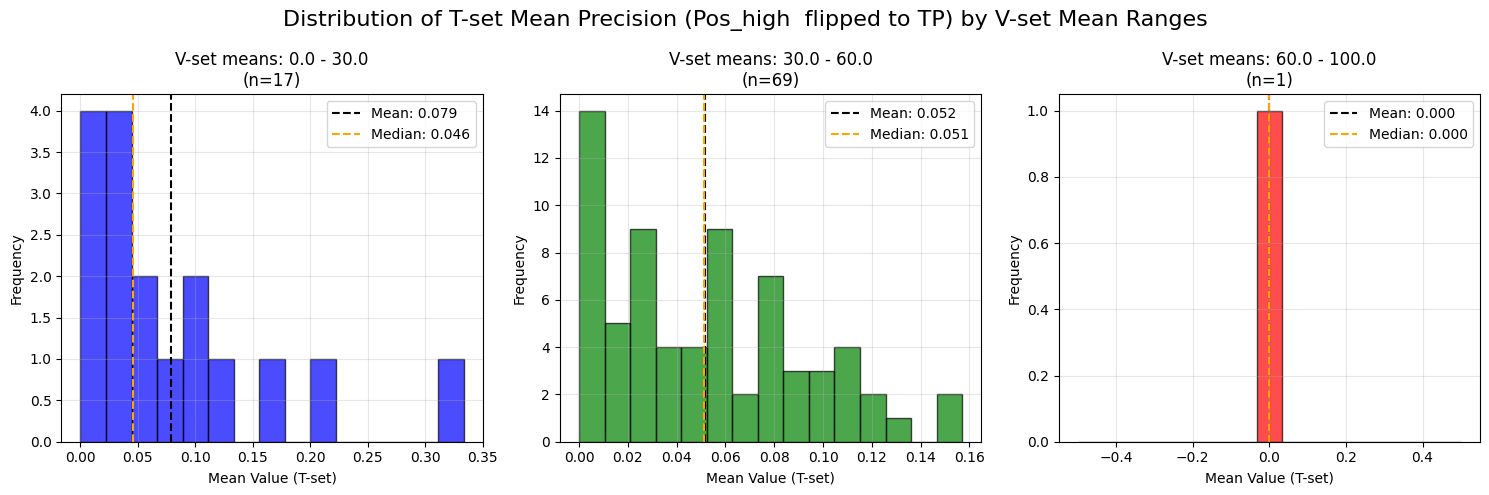

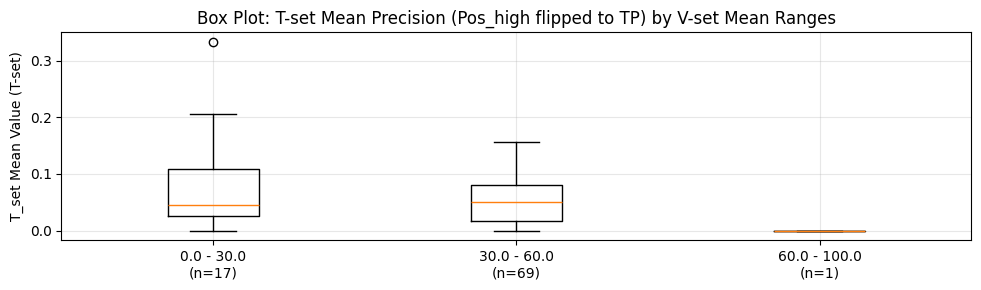

Statistics by (V-set) Mean Range:

Range: 0.0 - 30.0
  Count: 17
  T-set mean  - Mean:   0.0787
  T-set mean  - Median: 0.0458
  T-set mean  - Std:    0.0851
  T-set mean  - Min:    0.0000
  T-set mean - Max:    0.3333
  V-set mean - Mean:           25.3087

Range: 30.0 - 60.0
  Count: 69
  T-set mean  - Mean:   0.0516
  T-set mean  - Median: 0.0511
  T-set mean  - Std:    0.0410
  T-set mean  - Min:    0.0000
  T-set mean - Max:    0.1571
  V-set mean - Mean:           40.3622

Range: 60.0 - 100.0
  Count: 1
  T-set mean  - Mean:   0.0000
  T-set mean  - Median: 0.0000
  T-set mean  - Std:    0.0000
  T-set mean  - Min:    0.0000
  T-set mean - Max:    0.0000
  V-set mean - Mean:           100.0000


In [ ]:
## resutls should be very similar ot sanity check above 

import numpy as np
import matplotlib.pyplot as plt
from Functions_Analytic_1_Initial_GS_and_Dist_Analytics_HOD import create_three_panel_plots

# ---------- 0) Get metrics ONLY via your functions ----------
# Select *all* models on V-set (no filtering)
selected_models_all = select_models_by_criteria(
    results_data=results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(0, 100),
    min_seeds_per_model=1,
    max_models_to_return=len(results_dist_disc),  # include all; prevents sampling cap
    max_zero_precision_seeds=None,
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs=None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,
    random_seed=None,
)

# tset_models_keep = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
#                                       selected_models=selected_models_all,
#                                       brackets=((0.5, 0.7), (0.7, 1.0)))

# Recompute the same models on T-set with a NO-OP policy (no FP rewriting)
tset_models_keep = recompute_metrics_ignoring_pos_fp(
    selected_models_output=selected_models_all,
    results_data=results_dist_disc_Tset_same_seeds_organized,
    targets=None,           # target nothing
    fp_treatment="keep",    # leave FPs as-is (no-op)
)

# ---------- 1) Build aligned vectors (V_set = V-set means, T_set = T-set means) ----------
V_set_map = {m["combo_index"]: m.get("mean_precision", np.nan) for m in selected_models_all}
T_set_map = {m["combo_index"]: m.get("mean_precision", np.nan) for m in tset_models_keep}

# Keep consistent V-set ordering and only models present in both
combo_order = [m["combo_index"] for m in selected_models_all if m["combo_index"] in T_set_map]

v_mean     = np.array([V_set_map[c] for c in combo_order], dtype=float)  # V_set = V-set (from selection fn)
v_new_mean = np.array([T_set_map[c] for c in combo_order], dtype=float)  # T_set = T-set (from recompute fn)

# Drop NaN/Inf in lockstep (keep only pairs where both are finite)
valid = np.isfinite(v_mean) & np.isfinite(v_new_mean)
V_set = v_mean[valid]
T_set = v_new_mean[valid]

# ---------- 2) Define V_set-mean ranges (bin by V_set) ----------
ranges = [(0, 30), (30, 60), (60, 100)]
range_labels = ['0.0 - 30.0', '30.0 - 60.0', '60.0 - 100.0']
colors = ['blue', 'green', 'red']

# ---------- 3) Create all three plots with simplified function ----------
create_three_panel_plots(
    V_set_data=V_set, 
    T_set_data=T_set, 
    ranges=ranges, 
    range_labels=range_labels, 
    colors=colors,
    plot_title_A='Distribution of V-set Mean Precision by V-set Mean Ranges',
    plot_title_B='Distribution of T-set Mean Precision by V-set Mean Ranges', 
    plot_title_C='Box Plot: T-set Mean Precision by V-set Mean Ranges'
)

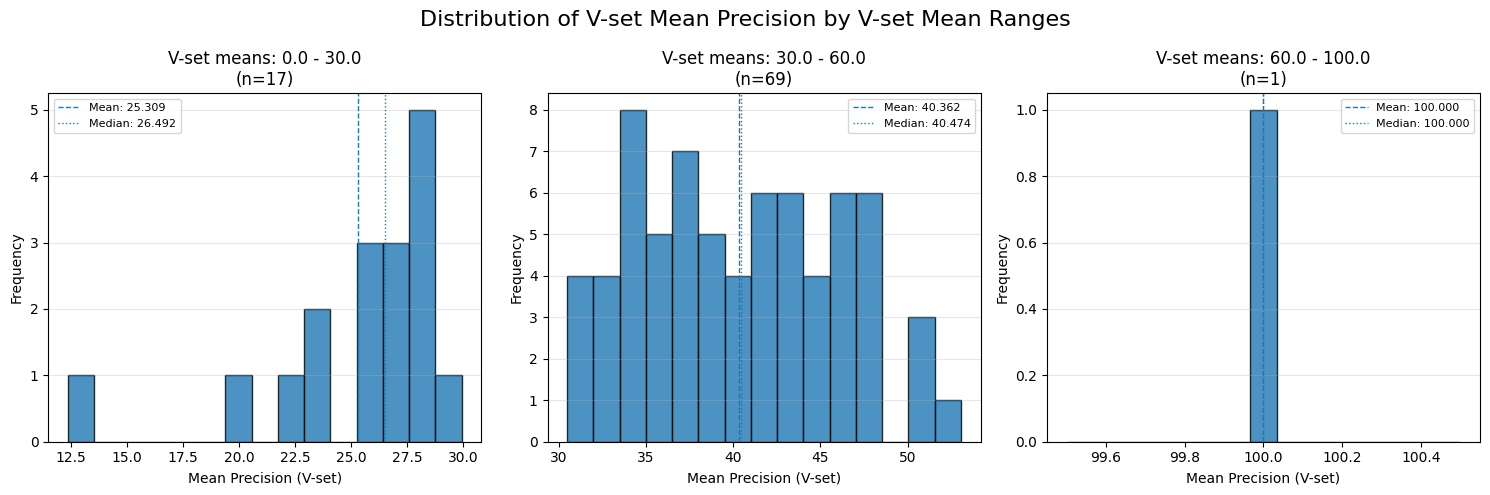

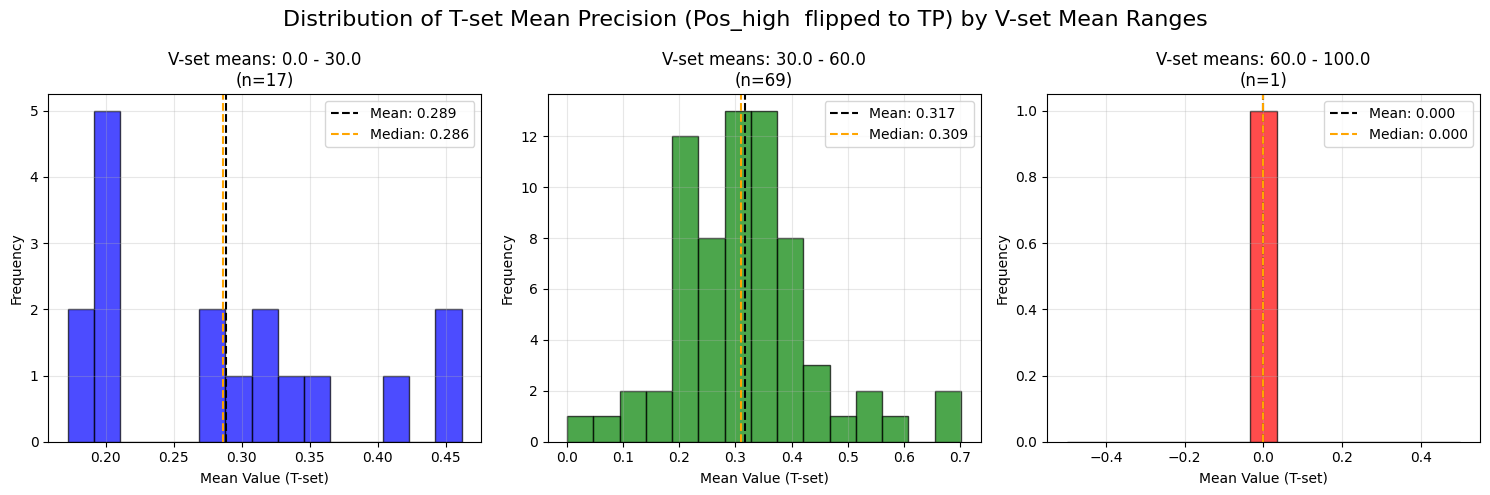

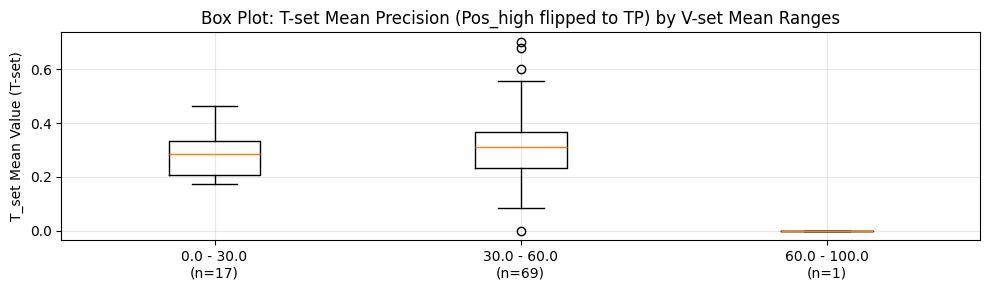

Statistics by (V-set) Mean Range:

Range: 0.0 - 30.0
  Count: 17
  T-set mean  - Mean:   0.2885
  T-set mean  - Median: 0.2861
  T-set mean  - Std:    0.0904
  T-set mean  - Min:    0.1721
  T-set mean - Max:    0.4615
  V-set mean - Mean:           25.3087

Range: 30.0 - 60.0
  Count: 69
  T-set mean  - Mean:   0.3175
  T-set mean  - Median: 0.3091
  T-set mean  - Std:    0.1248
  T-set mean  - Min:    0.0000
  T-set mean - Max:    0.7019
  V-set mean - Mean:           40.3622

Range: 60.0 - 100.0
  Count: 1
  T-set mean  - Mean:   0.0000
  T-set mean  - Median: 0.0000
  T-set mean  - Std:    0.0000
  T-set mean  - Min:    0.0000
  T-set mean - Max:    0.0000
  V-set mean - Mean:           100.0000


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from Functions_Analytic_1_Initial_GS_and_Dist_Analytics_HOD import create_three_panel_plots

# ---------- 0) Get metrics ONLY via your functions ----------
# Select *all* models on V-set (no filtering)
selected_models_all = select_models_by_criteria(
    results_data=results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(0, 100),
    min_seeds_per_model=1,
    max_models_to_return=len(results_dist_disc),  # include all; prevents sampling cap
    max_zero_precision_seeds=None,
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs=None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,
    random_seed=None,
)

# tset_models_keep = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
#                                       selected_models=selected_models_all,
#                                       brackets=((0.5, 0.7), (0.7, 1.0)))

# Recompute the same models on T-set with a NO-OP policy (no FP rewriting)
tset_models_keep = recompute_metrics_ignoring_pos_fp(
    selected_models_output=selected_models_all,
    results_data=results_dist_disc_Tset_same_seeds_organized,
    targets=("pos_high"),           # target nothing
    fp_treatment="flip_to_tp",    # leave FPs as-is (no-op)
)

# ---------- 1) Build aligned vectors (V_set = V-set means, T_set = T-set means) ----------
V_set_map = {m["combo_index"]: m.get("mean_precision", np.nan) for m in selected_models_all}
T_set_map = {m["combo_index"]: m.get("mean_precision", np.nan) for m in tset_models_keep}

# Keep consistent V-set ordering and only models present in both
combo_order = [m["combo_index"] for m in selected_models_all if m["combo_index"] in T_set_map]

v_mean     = np.array([V_set_map[c] for c in combo_order], dtype=float)  # V_set = V-set (from selection fn)
v_new_mean = np.array([T_set_map[c] for c in combo_order], dtype=float)  # T_set = T-set (from recompute fn)

# Drop NaN/Inf in lockstep (keep only pairs where both are finite)
valid = np.isfinite(v_mean) & np.isfinite(v_new_mean)
V_set = v_mean[valid]
T_set = v_new_mean[valid]

# ---------- 2) Define V_set-mean ranges (bin by V_set) ----------
ranges = [(0, 30), (30, 60), (60, 100)]
range_labels = ['0.0 - 30.0', '30.0 - 60.0', '60.0 - 100.0']
colors = ['blue', 'green', 'red']

# ---------- 3) Create all three plots with simplified function ----------
create_three_panel_plots(
    V_set_data=V_set, 
    T_set_data=T_set, 
    ranges=ranges, 
    range_labels=range_labels, 
    colors=colors,
    plot_title_A='Distribution of V-set Mean Precision by V-set Mean Ranges',
    plot_title_B='Distribution of T-set Mean Precision (Pos_high  flipped to TP) by V-set Mean Ranges', 
    plot_title_C='Box Plot: T-set Mean Precision (Pos_high flipped to TP) by V-set Mean Ranges'
)

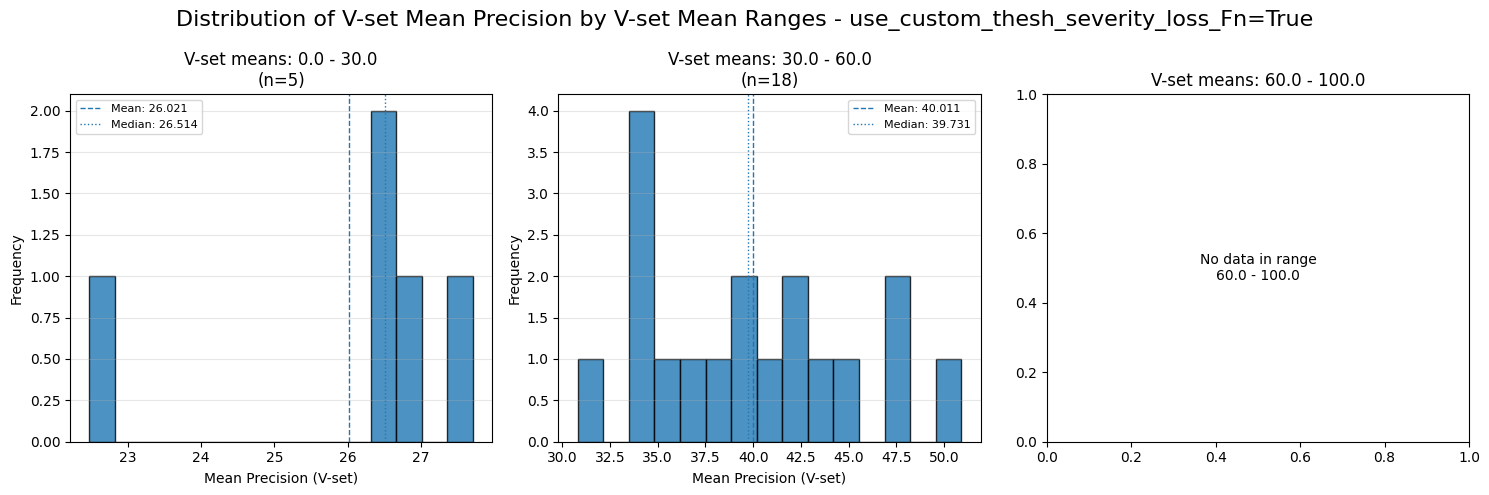

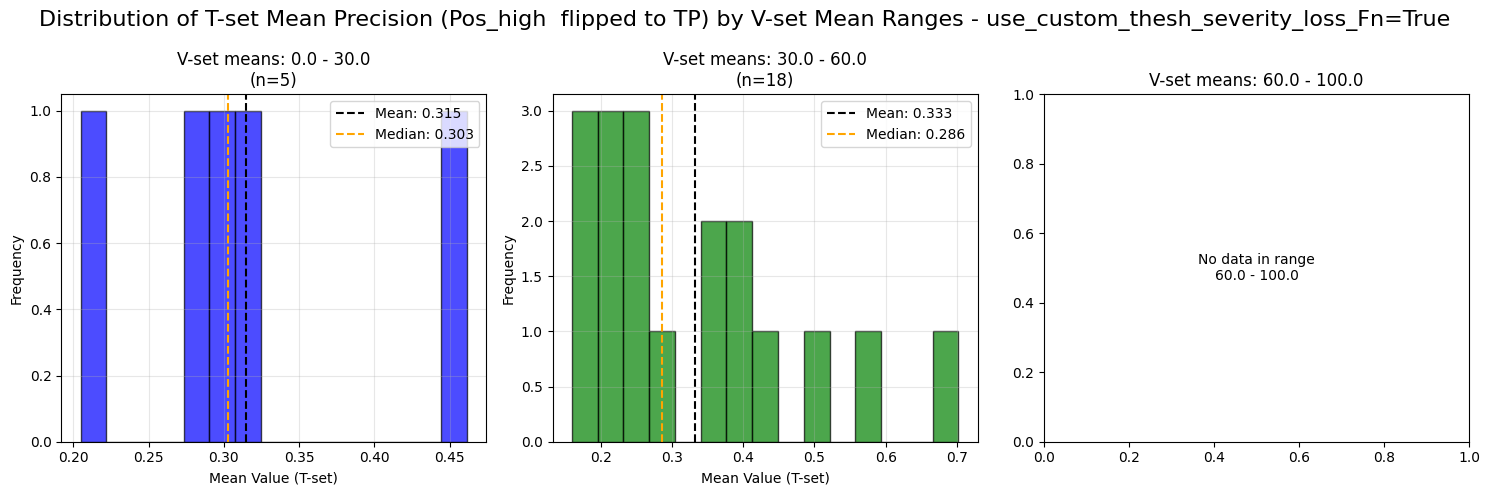

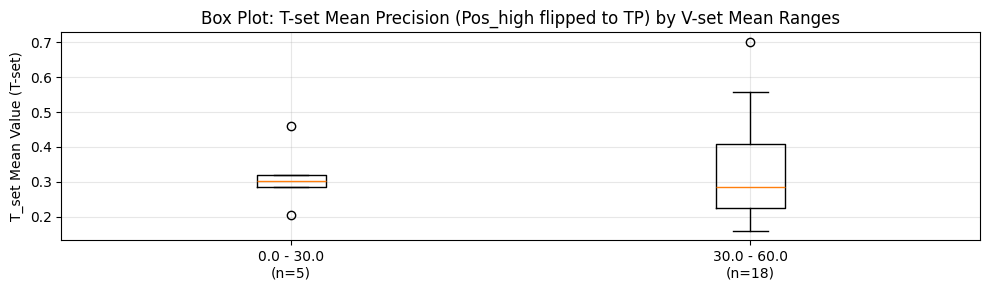

Statistics by (V-set) Mean Range:

Range: 0.0 - 30.0
  Count: 5
  T-set mean  - Mean:   0.3147
  T-set mean  - Median: 0.3030
  T-set mean  - Std:    0.0832
  T-set mean  - Min:    0.2048
  T-set mean - Max:    0.4615
  V-set mean - Mean:           26.0213

Range: 30.0 - 60.0
  Count: 18
  T-set mean  - Mean:   0.3328
  T-set mean  - Median: 0.2858
  T-set mean  - Std:    0.1425
  T-set mean  - Min:    0.1597
  T-set mean - Max:    0.7019
  V-set mean - Mean:           40.0115

Range: 60.0 - 100.0 - No data


In [14]:
####                        MODELS with CUSTOM BCE LOSS FUNCTION -- THRESH AND SEVERITY
import numpy as np
import matplotlib.pyplot as plt
from Functions_Analytic_1_Initial_GS_and_Dist_Analytics_HOD import create_three_panel_plots

# ---------- 0) Get metrics ONLY via your functions ----------
# Select *all* models on V-set (no filtering)
selected_models_all = select_models_by_criteria(
    results_data=results_dist_disc,
    use_custom_thesh_severity_loss_Fn= True,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(0, 100),
    min_seeds_per_model=1,
    max_models_to_return=len(results_dist_disc),  # include all; prevents sampling cap
    max_zero_precision_seeds=None,
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs=None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,
    random_seed=None,
)

# tset_models_keep = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
#                                       selected_models=selected_models_all,
#                                       brackets=((0.5, 0.7), (0.7, 1.0)))

# Recompute the same models on T-set with a NO-OP policy (no FP rewriting)
tset_models_keep = recompute_metrics_ignoring_pos_fp(
    selected_models_output=selected_models_all,
    results_data=results_dist_disc_Tset_same_seeds_organized,
    targets=("pos_high"),           # target nothing
    fp_treatment="flip_to_tp",    # leave FPs as-is (no-op)
)

# ---------- 1) Build aligned vectors (V_set = V-set means, T_set = T-set means) ----------
V_set_map = {m["combo_index"]: m.get("mean_precision", np.nan) for m in selected_models_all}
T_set_map = {m["combo_index"]: m.get("mean_precision", np.nan) for m in tset_models_keep}

# Keep consistent V-set ordering and only models present in both
combo_order = [m["combo_index"] for m in selected_models_all if m["combo_index"] in T_set_map]

v_mean     = np.array([V_set_map[c] for c in combo_order], dtype=float)  # V_set = V-set (from selection fn)
v_new_mean = np.array([T_set_map[c] for c in combo_order], dtype=float)  # T_set = T-set (from recompute fn)

# Drop NaN/Inf in lockstep (keep only pairs where both are finite)
valid = np.isfinite(v_mean) & np.isfinite(v_new_mean)
V_set = v_mean[valid]
T_set = v_new_mean[valid]

# ---------- 2) Define V_set-mean ranges (bin by V_set) ----------
ranges = [(0, 30), (30, 60), (60, 100)]
range_labels = ['0.0 - 30.0', '30.0 - 60.0', '60.0 - 100.0']
colors = ['blue', 'green', 'red']

# ---------- 3) Create all three plots with simplified function ----------
create_three_panel_plots(
    V_set_data=V_set, 
    T_set_data=T_set, 
    ranges=ranges, 
    range_labels=range_labels, 
    colors=colors,
    plot_title_A='Distribution of V-set Mean Precision by V-set Mean Ranges - use_custom_thesh_severity_loss_Fn=True',
    plot_title_B='Distribution of T-set Mean Precision (Pos_high  flipped to TP) by V-set Mean Ranges - use_custom_thesh_severity_loss_Fn=True', 
    plot_title_C='Box Plot: T-set Mean Precision (Pos_high flipped to TP) by V-set Mean Ranges'
)

Models Selected control: 90
Total seeds selected control: 4470
Models Selected HIGH: 0
Total seeds selected HIGH: 0
Models Selected LOW: 37
Total seeds selected LOW: 1886


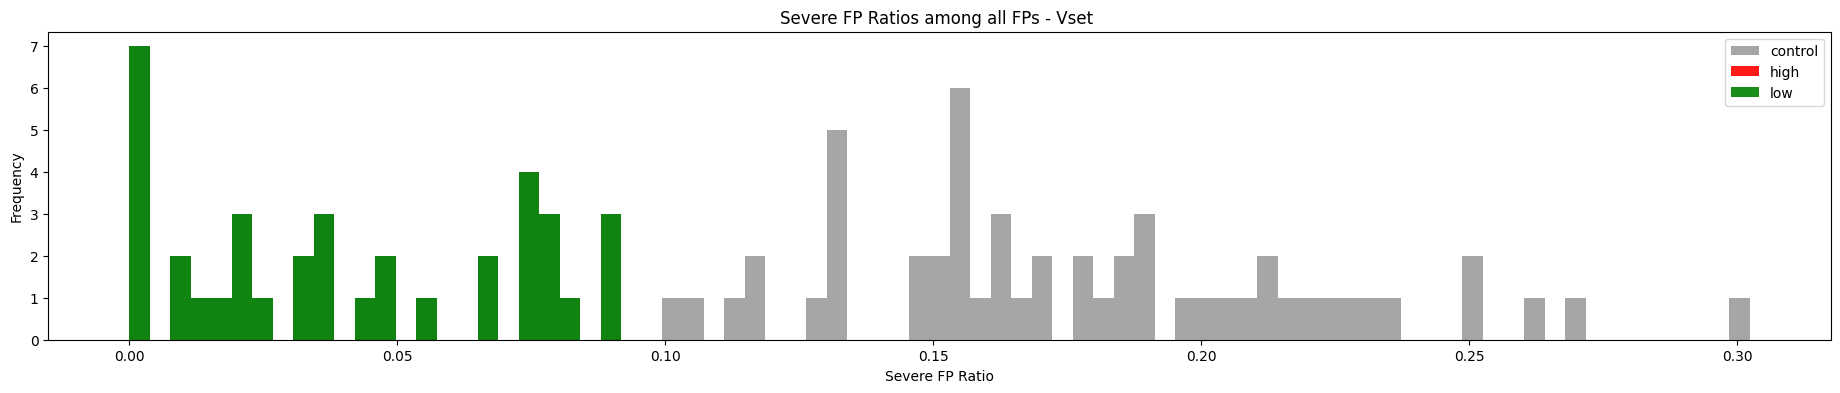

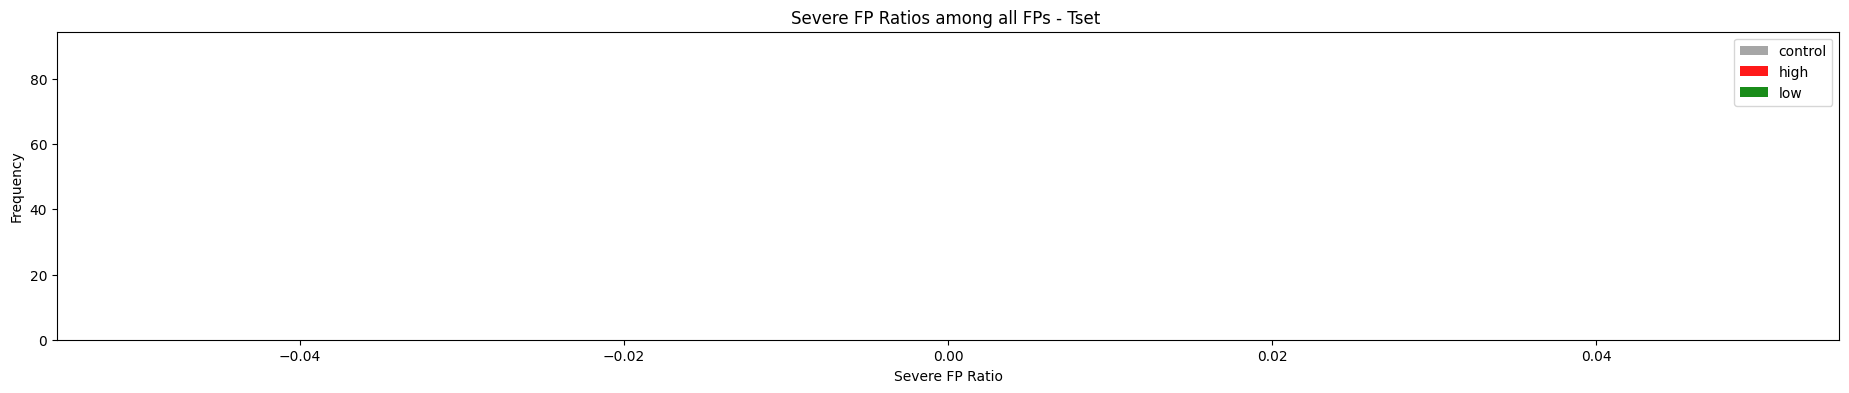

In [15]:
import random
####                                                                                TESTING max_FP_severe_ratio_FPs
# Run the model selection function with the new parameters
selected_models_control = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)  # No limit; get all that match criteria
)

selected_models_test_LOW_ratio___fp_severe_ratio_fps = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= .1,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)  # No limit; get all that match criteria
)


selected_models_test_HIGH_ratio___fp_severe_ratio_fps = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs= .8,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)  # No limit; get all that match criteria
)

selected_models_control_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_control,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))

selected_models_test_LOW_ratio___fp_severe_ratio_fps_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_test_LOW_ratio___fp_severe_ratio_fps,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))

selected_models_test_HIGH_ratio___fp_severe_ratio_fps_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_test_HIGH_ratio___fp_severe_ratio_fps,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))




# Print summary of selected models
print(f"Models Selected control: {len(selected_models_control)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models_control)
print(f"Total seeds selected control: {total_seeds}")

print(f"Models Selected HIGH: {len(selected_models_test_HIGH_ratio___fp_severe_ratio_fps)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models_test_HIGH_ratio___fp_severe_ratio_fps)
print(f"Total seeds selected HIGH: {total_seeds}")

print(f"Models Selected LOW: {len(selected_models_test_LOW_ratio___fp_severe_ratio_fps)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models_test_LOW_ratio___fp_severe_ratio_fps)
print(f"Total seeds selected LOW: {total_seeds}")


#his tof all severe FPs among all MODELS

list_ALL_fp_severe_ratio_fps_control = []
for i in selected_models_control:
    list_ALL_fp_severe_ratio_fps_control.append(i["fp_severe_ratio_fps"])

list_ALL_fp_severe_ratio_fps_low = []
for i in selected_models_test_LOW_ratio___fp_severe_ratio_fps:
    list_ALL_fp_severe_ratio_fps_low.append(i["fp_severe_ratio_fps"])

list_ALL_fp_severe_ratio_fps_high = []
for i in selected_models_test_HIGH_ratio___fp_severe_ratio_fps: 
    list_ALL_fp_severe_ratio_fps_high.append(i["fp_severe_ratio_fps"])

######################
list_ALL_fp_severe_ratio_fps_control_TEST = []
for i in selected_models_control_TEST:
    list_ALL_fp_severe_ratio_fps_control_TEST.append(i["fp_severe_ratio_fps"])

list_ALL_fp_severe_ratio_fps_low_TEST = []
for i in selected_models_test_LOW_ratio___fp_severe_ratio_fps_TEST:
    list_ALL_fp_severe_ratio_fps_low_TEST.append(i["fp_severe_ratio_fps"])

list_ALL_fp_severe_ratio_fps_high_TEST = []
for i in selected_models_test_HIGH_ratio___fp_severe_ratio_fps_TEST:
    list_ALL_fp_severe_ratio_fps_high_TEST.append(i["fp_severe_ratio_fps"])


all_vals = list_ALL_fp_severe_ratio_fps_control + list_ALL_fp_severe_ratio_fps_low + list_ALL_fp_severe_ratio_fps_high
Bins = np.linspace(min(all_vals), max(all_vals), 80)  # 30 bins, same edges for all

plt.figure(figsize = (23 , 4))
plt.hist(list_ALL_fp_severe_ratio_fps_control , bins=Bins , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_fp_severe_ratio_fps_high , bins = Bins , alpha = 0.9 , label = "high" , color = "red")
plt.hist(list_ALL_fp_severe_ratio_fps_low , bins = Bins , alpha = 0.9 , label = "low" , color = "green")
plt.title("Severe FP Ratios among all FPs - Vset ")
plt.xlabel("Severe FP Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.show()


all_vals = list_ALL_fp_severe_ratio_fps_control_TEST + list_ALL_fp_severe_ratio_fps_low_TEST + list_ALL_fp_severe_ratio_fps_high_TEST
Bins = np.linspace(min(all_vals), max(all_vals), 80)  # 30 bins, same edges for all

plt.figure(figsize = (23 , 4))
plt.hist(list_ALL_fp_severe_ratio_fps_control_TEST , bins=Bins , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_fp_severe_ratio_fps_high_TEST , bins = Bins , alpha = 0.9 , label = "high" , color = "red")
plt.hist(list_ALL_fp_severe_ratio_fps_low_TEST , bins = Bins , alpha = 0.9 , label = "low" , color = "green")
plt.title("Severe FP Ratios among all FPs - Tset ")
plt.xlabel("Severe FP Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.show()





mean control V 0.08604955139624743
mean custom loss severity V 0.09630281571537636
mean control T 0.0
mean custom loss severity T 0.0
-----
std control V 0.08886743426911609
std custom loss severity V 0.09557664222516205
std control T 0.0
std custom loss severity T 0.0


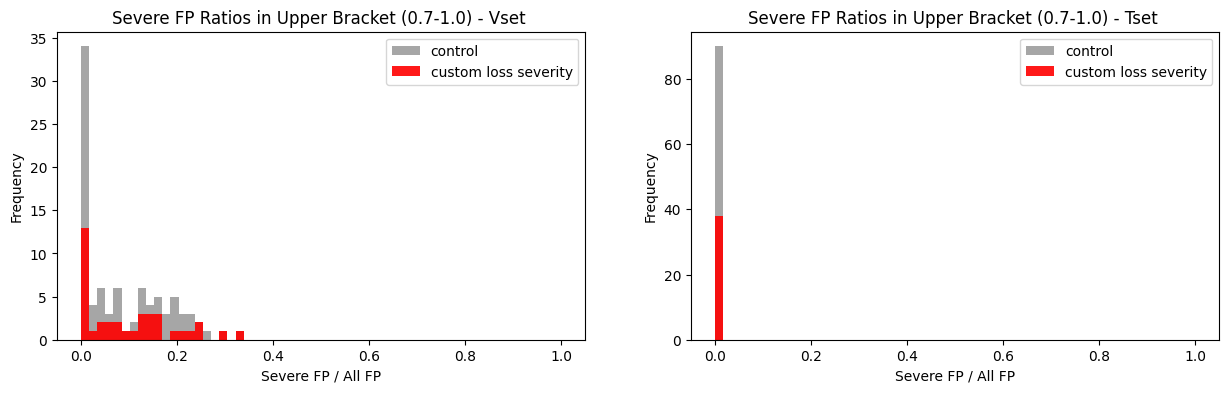

In [16]:
####                               UPPER BRACKET (0.7-1.0) SEVERE FPs --- USING CUSTOM SEVERITY + THRESH LOSS FUNCTION 


import random
####                                                                                TESTING max_FP_severe_ratio_FPs
# Run the model selection function with the new parameters
selected_models_control = select_models_by_criteria(
    results_dist_disc,

    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)  
)

selected_models_custom_loss_severity = select_models_by_criteria(
    results_dist_disc,
    # use_custom_thesh_severity_loss_Fn=True,
    use_custom_thesh_loss_Fn=True,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return= len(results_dist_disc) 
)



selected_models_control_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_control)

selected_models_custom_loss_severity_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_custom_loss_severity)





def ratio_calculator_FPs_allFP(selected_models):

    list_ALL_ratios = []
    for i in selected_models:

        if i.get("fp_severity_by_bracket" , None) is None:
            ratio = 0
            list_ALL_ratios.append(ratio)
            continue
        if i.get("bracket_counts" , None) is None:
            continue    
        if i.get("fp_severity_by_bracket").get("0.7-1.0") is None:
            ratio = 0
            list_ALL_ratios.append(ratio)
            continue
        if i.get("bracket_counts", []).get("0.7-1.0", None) is None:
            continue

        severe_count = i["fp_severity_by_bracket"].get("0.7-1.0").get("Severe (<-0.12)", 0)

        fp_count = i["bracket_counts"].get("0.7-1.0", {}).get("FP", 0)  # Avoid division by zero

        if fp_count > 0:
            ratio = severe_count / fp_count
        else:
            ratio = 0
        list_ALL_ratios.append(ratio)

    return list_ALL_ratios


list_ALL_ratios_control_V = ratio_calculator_FPs_allFP(selected_models_control)

list_ALL_ratios_custom_loss_severity_V = ratio_calculator_FPs_allFP(selected_models_custom_loss_severity)

##########

list_ALL_ratios_control_T = ratio_calculator_FPs_allFP(selected_models_control_TEST)

list_ALL_ratios_custom_loss_severity_T = ratio_calculator_FPs_allFP(selected_models_custom_loss_severity_TEST)


plt.figure(figsize = (15 , 4))
plt.subplot(1,2,1)

Bins = np.linspace(0, 1, 60)  # 30 bins, same edges for all
plt.hist(list_ALL_ratios_control_V , bins=Bins , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_ratios_custom_loss_severity_V , bins = Bins , alpha = 0.9 , label = "custom loss severity" , color = "red")
plt.title("Severe FP Ratios in Upper Bracket (0.7-1.0) - Vset ")
plt.xlabel("Severe FP / All FP")
plt.ylabel("Frequency")
plt.legend()
print("mean control V" , np.mean(list_ALL_ratios_control_V))
print("mean custom loss severity V" , np.mean(list_ALL_ratios_custom_loss_severity_V))
print("mean control T" , np.mean(list_ALL_ratios_control_T))
print("mean custom loss severity T" , np.mean(list_ALL_ratios_custom_loss_severity_T))
print("-----")
print("std control V" , np.std(list_ALL_ratios_control_V))
print("std custom loss severity V" , np.std(list_ALL_ratios_custom_loss_severity_V))
print("std control T" , np.std(list_ALL_ratios_control_T))
print("std custom loss severity T" , np.std(list_ALL_ratios_custom_loss_severity_T))


plt.subplot(1,2,2)

Bins = np.linspace(0, 1, 60)  # 30 bins, same edges for all
plt.hist(list_ALL_ratios_control_T , bins=Bins , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_ratios_custom_loss_severity_T , bins = Bins , alpha = 0.9 , label = "custom loss severity" , color = "red")
plt.title("Severe FP Ratios in Upper Bracket (0.7-1.0) - Tset ")
plt.xlabel("Severe FP / All FP")
plt.ylabel("Frequency")
plt.legend()
plt.show()





#  'bracket_counts': {'0.7-1.0': {'TP': 29, 'FP': 90},
#   '0.5-0.7': {'TP': 4, 'FP': 18}},
#  'non_bracket_counts': {'TN': 1092, 'FN': 207},
#  'fp_tp_ratios': {'0.7-1.0': 0.7563025210084033,
#   '0.5-0.7': 0.8181818181818182},
#  'ratio_difference': 0.06187929717341489,
#  'fp_severe_ratio_fps': 0.3425925925925926,
#  'fp_severe_ratio_fps_tps': 0.2624113475177305,
#  'fp_severity_by_bracket': {'0.5-0.7': {'Severe (<-0.12)': 9,
#    'Neg_low (-0.05) - 0': 4,
#    'Neg_mid (-0.12) - (-0.05)': 5},
#   '0.7-1.0': {'Neg_mid (-0.12) - (-0.05)': 22,
#    'Severe (<-0.12)': 28,




mean control V 0.08020443268208965
mean custom loss severity V 0.053119437820986964
mean control T 0.0
mean custom loss severity T 0.0
-----
std control V 0.09125021094824416
std custom loss severity V 0.0755295683403507
std control T 0.0
std custom loss severity T 0.0


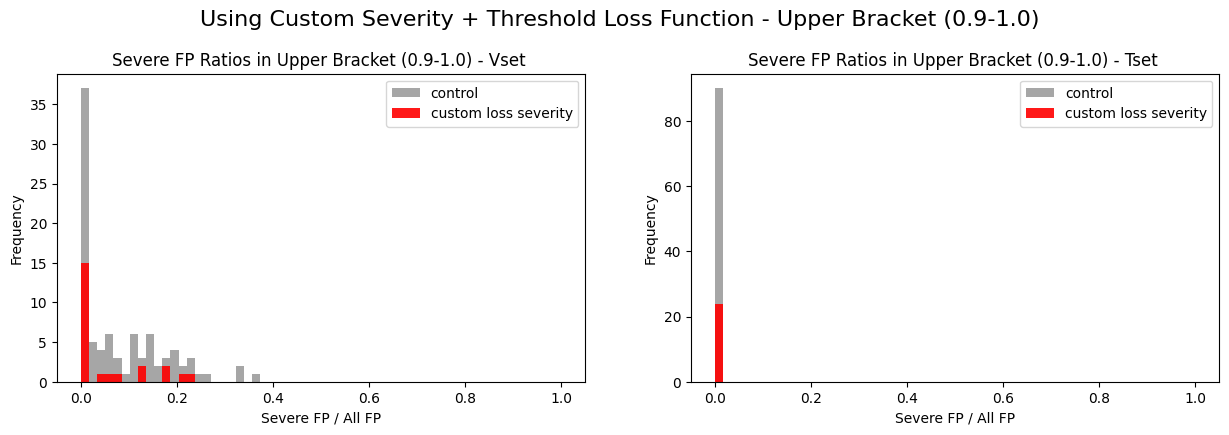

In [17]:
####                               UPPER BRACKET (0.9-1.0) SEVERE FPs --- USING CUSTOM SEVERITY + THRESH LOSS FUNCTION 


import random
####                                                                                TESTING max_FP_severe_ratio_FPs
# Run the model selection function with the new parameters
selected_models_control = select_models_by_criteria(
    results_dist_disc,

    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return= len(results_dist_disc)
)

selected_models_custom_loss_severity = select_models_by_criteria(
    results_dist_disc,
    use_custom_thesh_severity_loss_Fn=True,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return= len(results_dist_disc)
)



selected_models_control_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_control)

selected_models_custom_loss_severity_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_custom_loss_severity)




def ratio_calculator_FPs_allFP(selected_models):

    list_ALL_ratios = []
    for i in selected_models:

        if i.get("fp_severity_by_bracket" , None) is None:
            ratio = 0
            list_ALL_ratios.append(ratio)
            continue
        if i.get("bracket_counts" , None) is None:
            continue    
        if i.get("fp_severity_by_bracket").get("0.9-1.0") is None:
            ratio = 0
            list_ALL_ratios.append(ratio)
            continue
        if i.get("bracket_counts", []).get("0.9-1.0", None) is None:
            continue

        severe_count = i["fp_severity_by_bracket"].get("0.9-1.0").get("Severe (<-0.12)", 0)

        fp_count = i["bracket_counts"].get("0.9-1.0", {}).get("FP", 0)  # Avoid division by zero

        if fp_count > 0:
            ratio = severe_count / fp_count
        else:
            ratio = 0
        list_ALL_ratios.append(ratio)

    return list_ALL_ratios

    



list_ALL_ratios_control_V = ratio_calculator_FPs_allFP(selected_models_control)

list_ALL_ratios_custom_loss_severity_V = ratio_calculator_FPs_allFP(selected_models_custom_loss_severity)

##########

list_ALL_ratios_control_T = ratio_calculator_FPs_allFP(selected_models_control_TEST)

list_ALL_ratios_custom_loss_severity_T = ratio_calculator_FPs_allFP(selected_models_custom_loss_severity_TEST)
    


plt.figure(figsize = (15 , 4))
plt.subplot(1,2,1)

Bins = np.linspace(0, 1, 60)  # 30 bins, same edges for all
plt.hist(list_ALL_ratios_control_V , bins=Bins , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_ratios_custom_loss_severity_V , bins = Bins , alpha = 0.9 , label = "custom loss severity" , color = "red")
plt.title("Severe FP Ratios in Upper Bracket (0.9-1.0) - Vset ")
plt.xlabel("Severe FP / All FP")
plt.ylabel("Frequency")
plt.legend()
plt.subplot(1,2,2)

print("mean control V" , np.mean(list_ALL_ratios_control_V))
print("mean custom loss severity V" , np.mean(list_ALL_ratios_custom_loss_severity_V))
print("mean control T" , np.mean(list_ALL_ratios_control_T))
print("mean custom loss severity T" , np.mean(list_ALL_ratios_custom_loss_severity_T))
print("-----")
print("std control V" , np.std(list_ALL_ratios_control_V))
print("std custom loss severity V" , np.std(list_ALL_ratios_custom_loss_severity_V))
print("std control T" , np.std(list_ALL_ratios_control_T))
print("std custom loss severity T" , np.std(list_ALL_ratios_custom_loss_severity_T))

Bins = np.linspace(0, 1, 60)  # 30 bins, same edges for all
plt.hist(list_ALL_ratios_control_T , bins=Bins , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_ratios_custom_loss_severity_T , bins = Bins , alpha = 0.9 , label = "custom loss severity" , color = "red")
plt.title("Severe FP Ratios in Upper Bracket (0.9-1.0) - Tset ")
plt.xlabel("Severe FP / All FP")
plt.ylabel("Frequency")
plt.legend()
plt.suptitle("Using Custom Severity + Threshold Loss Function - Upper Bracket (0.9-1.0)" , y=1.04 , fontsize=16) 
plt.show()








mean control V 0.12995600136246327
mean custom loss severity V 0.0677356371257822
mean control T 0.0
mean custom loss severity T 0.0
-----
std control V 0.1689231702282913
std custom loss severity V 0.10110608929674215
std control T 0.0
std custom loss severity T 0.0


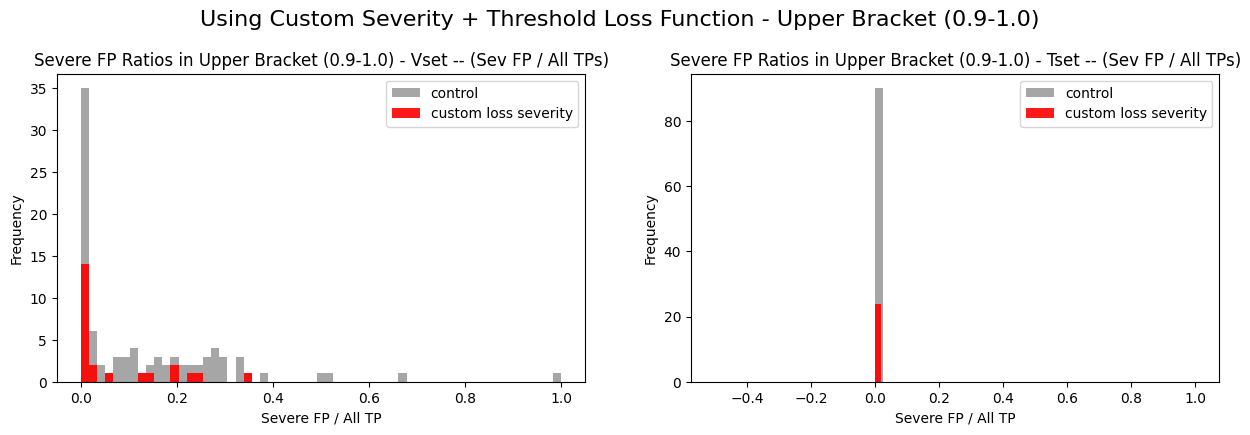

In [18]:
####                               UPPER BRACKET (0.9-1.0) SEVERE FPs / All TPs --- USING CUSTOM SEVERITY + THRESH LOSS FUNCTION 


import random

# Run the model selection function with the new parameters
selected_models_control = select_models_by_criteria(
    results_dist_disc,

    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)

selected_models_custom_loss_severity = select_models_by_criteria(
    results_dist_disc,
    use_custom_thesh_severity_loss_Fn=True,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)



selected_models_control_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_control)

selected_models_custom_loss_severity_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_custom_loss_severity)


def ratio_calculator_FPs_allTP(selected_models):

    list_ALL_ratios = []
    for i in selected_models:

        if i.get("fp_severity_by_bracket" , None) is None:
            ratio = 0
            list_ALL_ratios.append(ratio)
            continue
        if i.get("bracket_counts" , None) is None:
            continue
        if i.get("fp_severity_by_bracket").get("0.9-1.0") is None:
            ratio = 0
            list_ALL_ratios.append(ratio)
            continue
        if i.get("bracket_counts", []).get("0.9-1.0", None) is None:
            continue
        if i.get("bracket_counts", []).get("0.9-1.0", None).get("TP", None) is None:
            ratio = 1
            list_ALL_ratios.append(ratio)
            continue

        severe_count = i.get("fp_severity_by_bracket").get("0.9-1.0").get("Severe (<-0.12)", 0)
        tp_count = i.get("bracket_counts", []).get("0.9-1.0", []).get("TP", 0)  # Avoid division by zero

        if tp_count > 0 and severe_count != None:

            ratio = severe_count / tp_count
        else:
            ratio = 0

        list_ALL_ratios.append(ratio)

    return list_ALL_ratios


list_ALL_ratios_control_V = ratio_calculator_FPs_allTP(selected_models_control)

list_ALL_ratios_custom_loss_severity_V = ratio_calculator_FPs_allTP(selected_models_custom_loss_severity)

##########

list_ALL_ratios_control_T = ratio_calculator_FPs_allTP(selected_models_control_TEST)

list_ALL_ratios_custom_loss_severity_T = ratio_calculator_FPs_allTP(selected_models_custom_loss_severity_TEST)

plt.figure(figsize = (15 , 4))
plt.subplot(1,2,1)

max_all = max( max(list_ALL_ratios_control_V) , max(list_ALL_ratios_custom_loss_severity_V) , max(list_ALL_ratios_control_T) , max(list_ALL_ratios_custom_loss_severity_T))
min_all = min( min(list_ALL_ratios_control_V) , min(list_ALL_ratios_custom_loss_severity_V) , min(list_ALL_ratios_control_T) , min(list_ALL_ratios_custom_loss_severity_T))
Bins = np.linspace(min_all, max_all, 60)

  # 30 bins, same edges for all
plt.hist(list_ALL_ratios_control_V , bins=Bins , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_ratios_custom_loss_severity_V , bins = Bins , alpha = 0.9 , label = "custom loss severity" , color = "red")
plt.title("Severe FP Ratios in Upper Bracket (0.9-1.0) - Vset -- (Sev FP / All TPs)")
plt.xlabel("Severe FP / All TP")
plt.ylabel("Frequency")
plt.legend()
plt.subplot(1,2,2)

print("mean control V" , np.mean(list_ALL_ratios_control_V))
print("mean custom loss severity V" , np.mean(list_ALL_ratios_custom_loss_severity_V))
print("mean control T" , np.mean(list_ALL_ratios_control_T))
print("mean custom loss severity T" , np.mean(list_ALL_ratios_custom_loss_severity_T))
print("-----")
print("std control V" , np.std(list_ALL_ratios_control_V))
print("std custom loss severity V" , np.std(list_ALL_ratios_custom_loss_severity_V))
print("std control T" , np.std(list_ALL_ratios_control_T))
print("std custom loss severity T" , np.std(list_ALL_ratios_custom_loss_severity_T))

  # 30 bins, same edges for all
plt.hist(list_ALL_ratios_control_T , bins=40 , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_ratios_custom_loss_severity_T , bins = Bins , alpha = 0.9 , label = "custom loss severity" , color = "red")
plt.title("Severe FP Ratios in Upper Bracket (0.9-1.0) - Tset -- (Sev FP / All TPs)")
plt.xlabel("Severe FP / All TP")
plt.ylabel("Frequency")
plt.legend()
plt.suptitle("Using Custom Severity + Threshold Loss Function - Upper Bracket (0.9-1.0)" , y=1.04 , fontsize=16) 
plt.show()





Models Selected control: 90
Total seeds selected control: 4470
Models Selected POS: 54
Total seeds selected POS: 2870
Models Selected NEG: 21
Total seeds selected NEG: 986


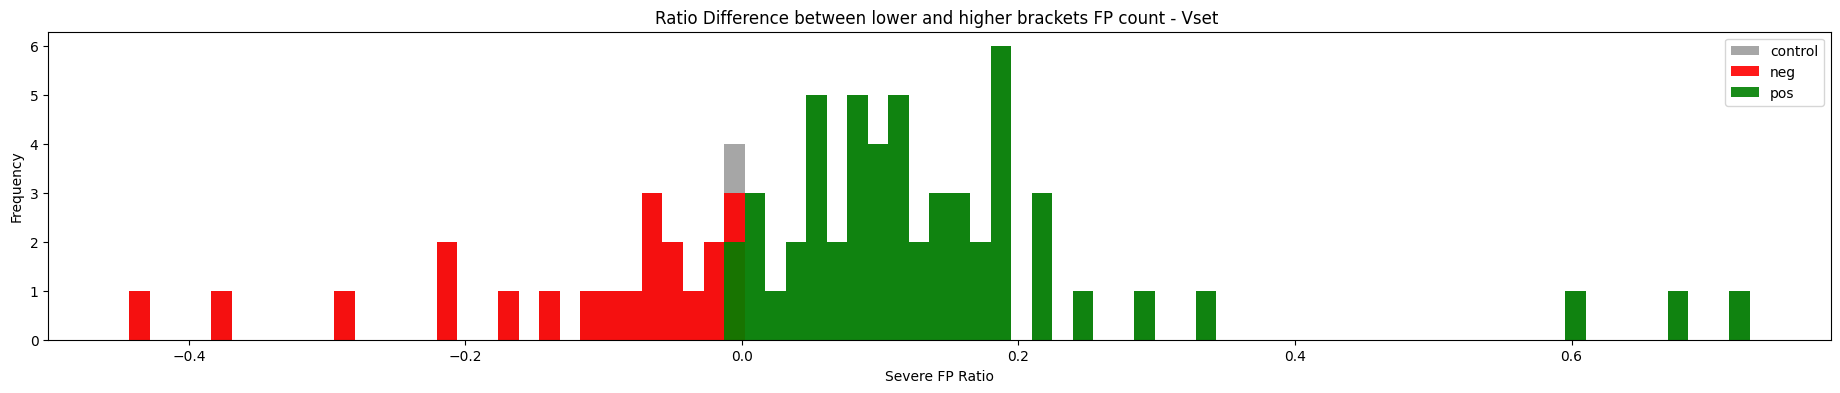

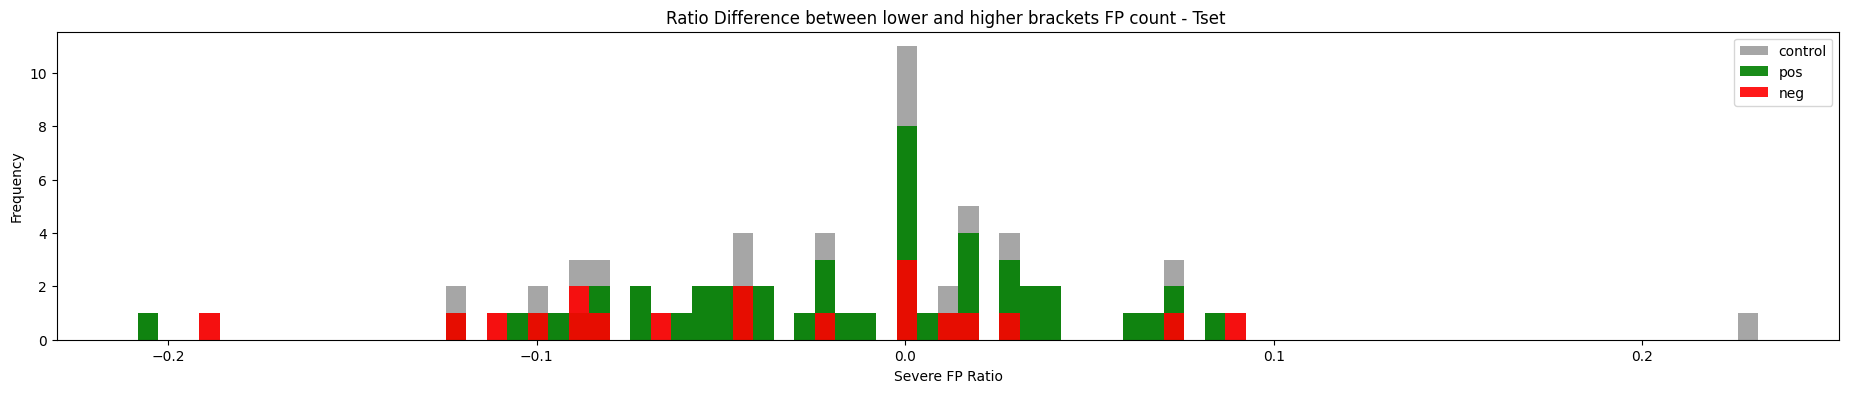

In [ ]:
####                                                              TESTING min_ratio_difference between higher and lower brackets FP count 

## still to be tested: remove the pos high adn see fi the dist change is less severe 



# Run the model selection function with the new parameters
selected_models_control = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)

selected_models_test_POS_ratio = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference=0,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)


selected_models_test_NEG_ratio = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference= 0,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs= None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)

selected_models_control_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_control,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))

selected_models_test_POS_ratio_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_test_POS_ratio,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))

selected_models_test_NEG_ratio_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_test_NEG_ratio,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))





# Print summary of selected models
print(f"Models Selected control: {len(selected_models_control)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models_control)
print(f"Total seeds selected control: {total_seeds}")

print(f"Models Selected POS: {len(selected_models_test_POS_ratio)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models_test_POS_ratio)
print(f"Total seeds selected POS: {total_seeds}")

print(f"Models Selected NEG: {len(selected_models_test_NEG_ratio)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models_test_NEG_ratio)
print(f"Total seeds selected NEG: {total_seeds}")




#his tof all severe FPs among all MODELS

list_ALL_control = []
for i in selected_models_control:
    list_ALL_control.append(i["ratio_difference"])

list_ALL_control = [i for i in list_ALL_control if i is not None]

list_ALL_neg = []
for i in selected_models_test_NEG_ratio:
    list_ALL_neg.append(i["ratio_difference"])

list_ALL_pos = []
for i in selected_models_test_POS_ratio:
    list_ALL_pos.append(i["ratio_difference"])

######################

list_ALL_control_TEST = []
for i in selected_models_control_TEST:
    list_ALL_control_TEST.append(i["ratio_difference"])

list_ALL_control_TEST = [i for i in list_ALL_control_TEST if i is not None]





list_ALL_neg_TEST = []
for i in selected_models_test_NEG_ratio_TEST:
    list_ALL_neg_TEST.append(i["ratio_difference"])

list_ALL_neg_TEST = [i for i in list_ALL_neg_TEST if i is not None]

list_ALL_pos_TEST = []
for i in selected_models_test_POS_ratio_TEST:
    list_ALL_pos_TEST.append(i["ratio_difference"])

list_ALL_pos_TEST = [i for i in list_ALL_pos_TEST if i is not None]






all_vals = list_ALL_control + list_ALL_neg + list_ALL_pos 
Bins = np.linspace(min(all_vals), max(all_vals), 80)  # 30 bins, same edges for all

plt.figure(figsize = (23 , 4))
plt.hist(list_ALL_control , bins=Bins , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_neg , bins = Bins , alpha = 0.9 , label = "neg" , color = "red")
plt.hist(list_ALL_pos , bins = Bins , alpha = 0.9 , label = "pos" , color = "green")
plt.title("Ratio Difference between lower and higher brackets FP count - Vset ")
plt.xlabel("Ratio Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()


all_vals = list_ALL_control_TEST + list_ALL_neg_TEST + list_ALL_pos_TEST 
Bins = np.linspace(min(all_vals), max(all_vals), 80)  # 30 bins, same edges for all


plt.figure(figsize = (23 , 4))
plt.hist(list_ALL_control_TEST , bins= Bins , alpha = 0.7 , label = "control" , color = "grey")
# plt.hist(list_ALL_fp_severe_ratio_fps_control_TEST_ADJUSTED_FPs , bins=Bins , alpha = 0.7 , label = "control - adjusted FPs" , color = "black" )
plt.hist(list_ALL_pos_TEST , bins = Bins , alpha = 0.9 , label = "pos" , color = "green")
plt.hist(list_ALL_neg_TEST , bins = Bins , alpha = 0.9 , label = "neg" , color = "red")
plt.title("Ratio Difference between lower and higher brackets FP count - Tset ")
plt.xlabel("Ratio Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()










Models Selected control: 90
Total seeds selected control: 4946
Models Selected high: 56
Total seeds selected high: 3356
Models Selected low: 23
Total seeds selected low: 948


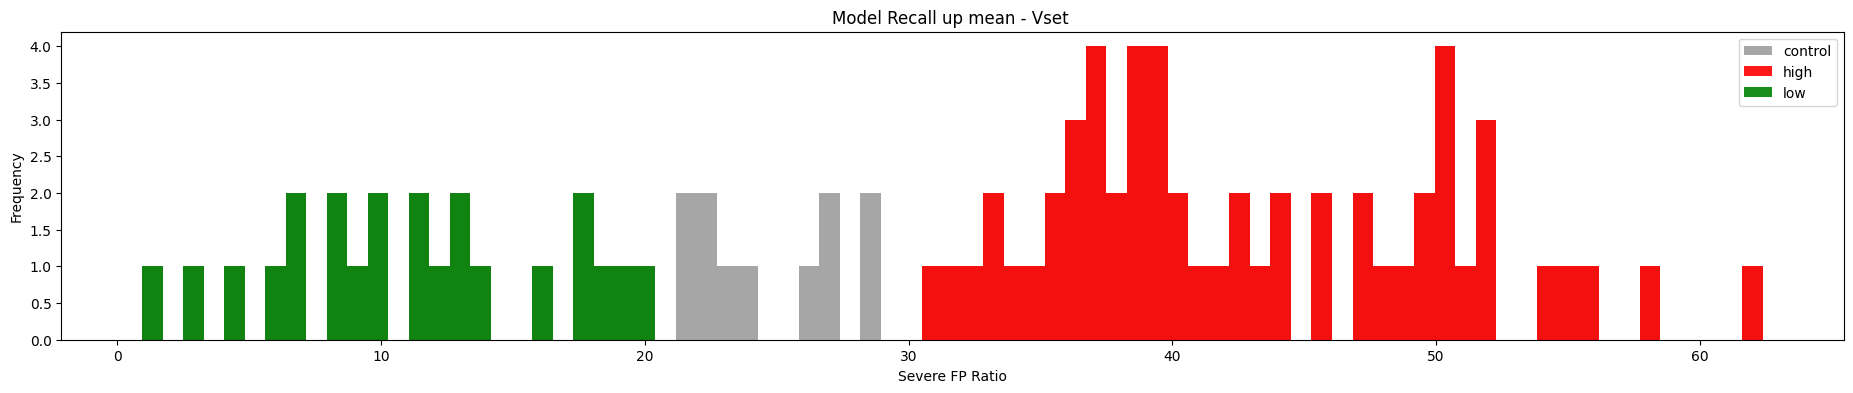

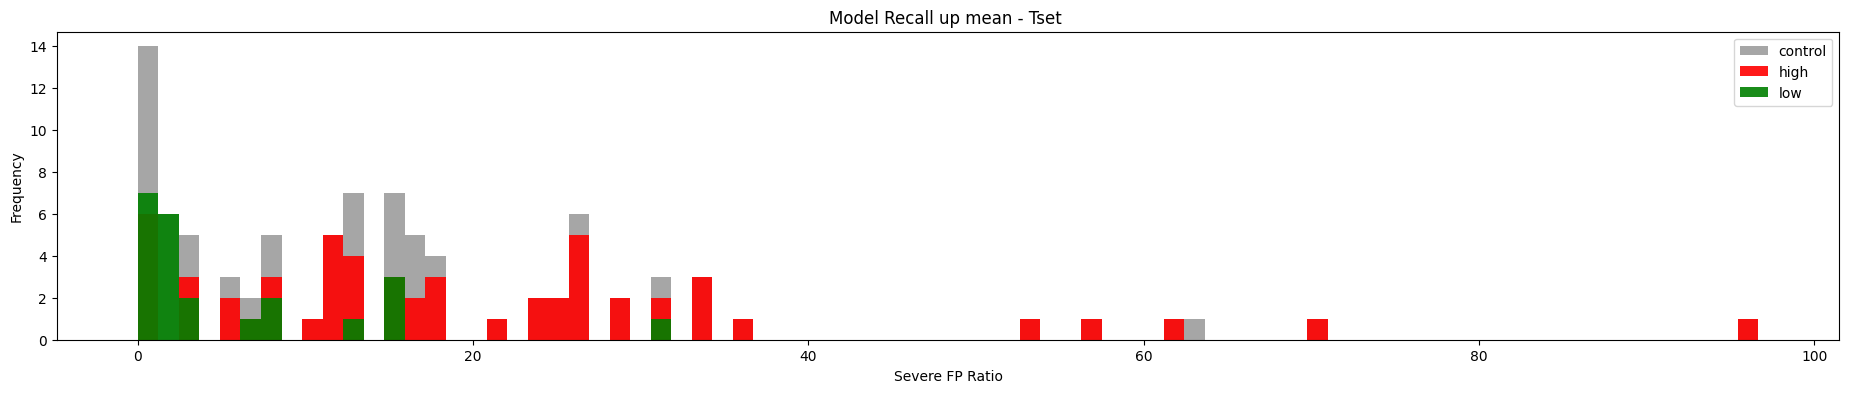

In [ ]:
####                                                                    Testing for change is the dist of RECALL up in V vs T set  

## still to be tested: remove the pos high adn see fi the dist change is less severe 



# Run the model selection function with the new parameters
selected_models_control = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    mean_recall_up_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(0, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)

selected_models_test_low = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    mean_recall_up_range=(0, 20),
    seed_precision_range=(0, 100),
    seed_recall_range=(0, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)


selected_models_test_high = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    mean_recall_up_range=(30, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(0, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference= None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs= None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)

selected_models_control_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_control,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))

selected_models_test_high_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_test_high,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))

selected_models_test_low_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_test_low,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))




# Print summary of selected models
print(f"Models Selected control: {len(selected_models_control)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models_control)
print(f"Total seeds selected control: {total_seeds}")

print(f"Models Selected high: {len(selected_models_test_high)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models_test_high)
print(f"Total seeds selected high: {total_seeds}")

print(f"Models Selected low: {len(selected_models_test_low)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models_test_low)
print(f"Total seeds selected low: {total_seeds}")



#his tof all severe FPs among all MODELS

list_ALL_control = []
for i in selected_models_control:
    list_ALL_control.append(i["mean_recall_up"])
list_ALL_control = [i for i in list_ALL_control if i is not None]

list_ALL_high = []
for i in selected_models_test_high:
    list_ALL_high.append(i["mean_recall_up"])
list_ALL_high = [i for i in list_ALL_high if i is not None]

list_ALL_low = []
for i in selected_models_test_low:
    list_ALL_low.append(i["mean_recall_up"])
list_ALL_low = [i for i in list_ALL_low if i is not None]

######################

list_ALL_control_TEST = []
for i in selected_models_control_TEST:
    list_ALL_control_TEST.append(i["mean_recall_up"])
list_ALL_control_TEST = [i for i in list_ALL_control_TEST if i is not None]

list_ALL_high_TEST = []
for i in selected_models_test_high_TEST:
    list_ALL_high_TEST.append(i["mean_recall_up"])
list_ALL_high_TEST = [i for i in list_ALL_high_TEST if i is not None]

list_ALL_low_TEST = []
for i in selected_models_test_low_TEST:
    list_ALL_low_TEST.append(i["mean_recall_up"])
list_ALL_low_TEST = [i for i in list_ALL_low_TEST if i is not None]


all_vals = list_ALL_control + list_ALL_high + list_ALL_low
Bins = np.linspace(min(all_vals), max(all_vals), 80)  # 30 bins, same edges for all



plt.figure(figsize = (23 , 4))
plt.hist(list_ALL_control , bins=Bins , alpha = 0.7 , label = "control" , color = "grey")
plt.hist(list_ALL_high , bins = Bins , alpha = 0.9 , label = "high" , color = "red")
plt.hist(list_ALL_low , bins = Bins , alpha = 0.9 , label = "low" , color = "green")
plt.title("Model Recall up mean - Vset ")
plt.xlabel("Severe FP Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.show()


all_vals = list_ALL_control_TEST + list_ALL_low_TEST + list_ALL_high_TEST
Bins = np.linspace(min(all_vals), max(all_vals), 80)  # 30 bins, same edges for all


plt.figure(figsize = (23 , 4))
plt.hist(list_ALL_control_TEST , bins= Bins , alpha = 0.7 , label = "control" , color = "grey")
# plt.hist(list_ALL_fp_severe_ratio_fps_control_TEST_ADJUSTED_FPs , bins=Bins , alpha = 0.7 , label = "control - adjusted FPs" , color = "black" )
plt.hist(list_ALL_high_TEST , bins = Bins , alpha = 0.9 , label = "high" , color = "red")
plt.hist(list_ALL_low_TEST , bins = Bins , alpha = 0.9 , label = "low" , color = "green")
plt.title("Model Recall up mean - Tset ")
plt.xlabel("Severe FP Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.show()








In [ ]:


# Run the model selection function with the new parameters
selected_models = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(75, 100),
    mean_recall_up_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=0,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)

# Print summary of selected models
print(f"Models Selected control: {len(selected_models)}")
total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
print(f"Total seeds selected control: {total_seeds}")


selected_models[0]

Models Selected control: 1
Total seeds selected control: 4


{'combo_index': 53,
 'parameters': {'binary_0_1_cutoff_ret_rate_percentage': 0.1,
  'learning_rate': 0.05,
  'num_epochs': 300,
  'batch_size': 70,
  'use_bidirectional': False,
  'lag': 6,
  'input_size': 12,
  'hidden_size': 35,
  'num_layers': 6,
  'use_monthly_dfs_only': True,
  'use_binary_0_1_retRate': False,
  'use_custom_loss_function_BCE_THRESH': False,
  'use_custom_loss_function_BCE_THRESH_AND_SEVERITY': False,
  'use_LOW_weights_for_BCE_custom_loss': True,
  'pred_threshold_sigmoid01_up': None,
  'use_binary_neg1_1': False,
  'use_ret_rate': False,
  'use_print_acc': False,
  'use_dropout': False,
  'use_class_weighting': False,
  'is_deterministic': True,
  'seed_num': 60607,
  'use_existing_lagged_data': True,
  'use_dynamic_weights': False,
  'use_binary_0_1_retRate_custom_neg': False,
  'use_binary_0_1_retRate_custom_pos': True,
  'POS_weight_multiplier': 1.3,
  'use_rolling_fixed_train_size': False,
  'use_existing_initial_weights': False,
  'state_dict': None,
  'use_

In [ ]:
#####                                  SEED BASED ANALYSIS: max_seed_severe_FPs_high_bracket and min_seed_TPs_high_bracket


# Run the model selection function with the new parameters
selected_models_control = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  
    random_seed=42,
    max_models_to_return=len(results_dist_disc)
)

selected_models_test_0_fps1tps = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=len(results_dist_disc),
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs=None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=0, #***
    min_seed_TPs_high_bracket=1,  #***
    random_seed=42,
    max_models_to_return= len(results_dist_disc)
)

selected_models_test_maxFP_severe_ratio_FPs = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds= len(results_dist_disc),  
    min_ratio_difference=None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=3,
    max_FP_severe_ratio_FPs=None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None, #***
    min_seed_TPs_high_bracket=None,  #***
    random_seed=42,
    max_models_to_return= len(results_dist_disc)
)





selected_models_control_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_control,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))

selected_models_test_0_fps1tps_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_test_0_fps1tps,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))

selected_models_test_maxFP_severe_ratio_FPs_TEST = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
                                      selected_models_test_maxFP_severe_ratio_FPs,
                                      brackets=((0.5, 0.7), (0.7, 1.0)))



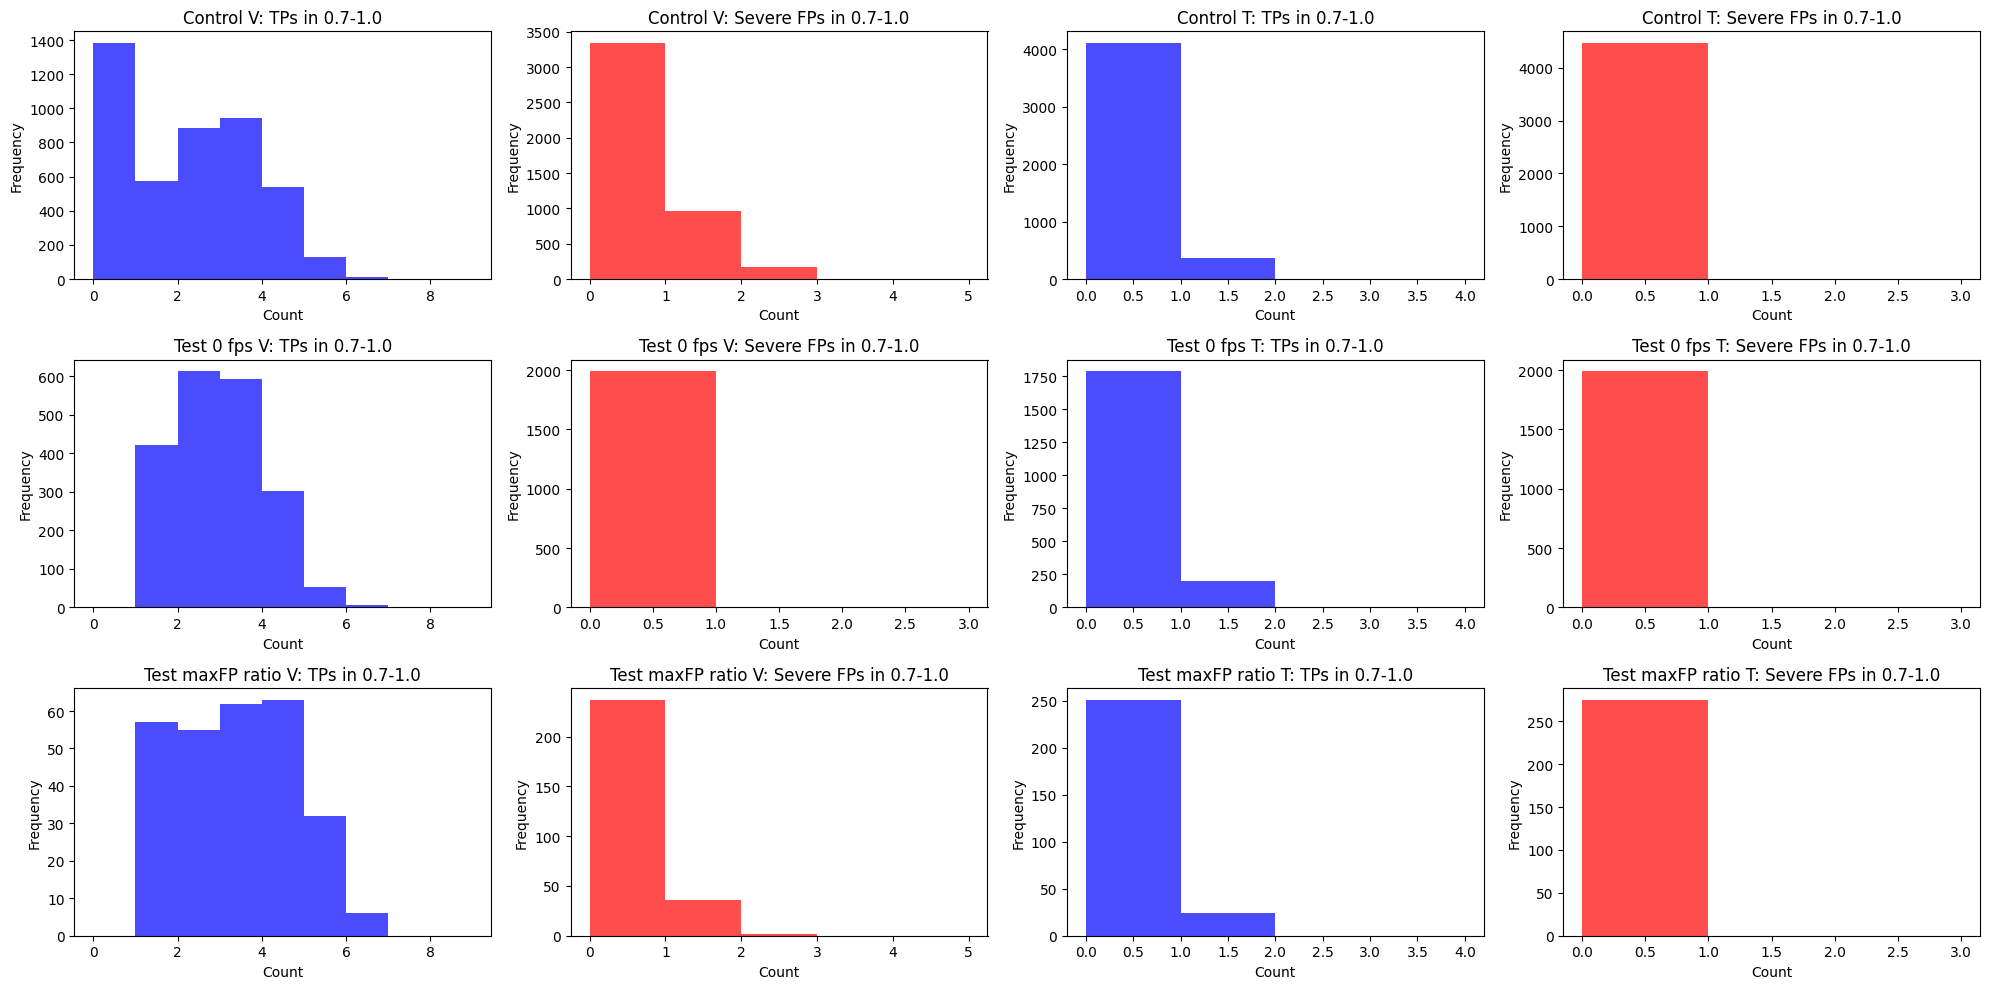

Control V seeds: 4470
Control T seeds: 4470
Test 0 fps V seeds: 1988
Test 0 fps T seeds: 1988
Test maxFP ratio V seeds: 275
Test maxFP ratio T seeds: 275

Severe FP Statistics:
Control V - Avg severe FPs: 0.29
Control T - Avg severe FPs: 0.00
Test 0 fps V - Avg severe FPs: 0.00
Test 0 fps T - Avg severe FPs: 0.00
Test maxFP ratio V - Avg severe FPs: 0.15
Test maxFP ratio T - Avg severe FPs: 0.00

Filtering check for test_highTP (max_severe_FPs_high_bracket=0):
Test 0 fps V - Seeds with 0 severe FPs: 1988/1988
Test 0 fps T - Seeds with 0 severe FPs: 1988/1988
Filtering check for test_maxFP_severe_ratio_FPs (max_FP_severe_ratio_FPs=0.2):
Test maxFP ratio V - Seeds with 0 severe FPs: 237/275
Test maxFP ratio T - Seeds with 0 severe FPs: 275/275

Filtering check for control (no severe FP filter):
Control T - Seeds with 0 severe FPs: 4470/4470


In [ ]:


# Extract seed data from control models (V set)
control_v_high_bracket_tps = []
control_v_high_bracket_severe_fps = []  # Changed to severe FPs

for model in selected_models_control:
    for seed in model["selected_seeds"]:
        high_bracket = seed["seed_bracket_counts"].get("0.7-1.0", {"TP": 0, "FP": 0})
        control_v_high_bracket_tps.append(high_bracket["TP"])
        control_v_high_bracket_severe_fps.append(seed["seed_severe_fp_high_bracket"])  # Severe FPs

# Extract seed data from control models (T set)
control_t_high_bracket_tps = []
control_t_high_bracket_severe_fps = []  # Changed to severe FPs

for model in selected_models_control_TEST:
    for seed in model["selected_seeds"]:
        high_bracket = seed["seed_bracket_counts"].get("0.7-1.0", {"TP": 0, "FP": 0})
        control_t_high_bracket_tps.append(high_bracket["TP"])
        control_t_high_bracket_severe_fps.append(seed["seed_severe_fp_high_bracket"])  # Severe FPs



# Extract seed data from test_highTP models (V set)  
test_v_high_bracket_tps = []
test_v_high_bracket_severe_fps = []  # Changed to severe FPs

for model in selected_models_test_0_fps1tps:
    for seed in model["selected_seeds"]:
        high_bracket = seed["seed_bracket_counts"].get("0.7-1.0", {"TP": 0, "FP": 0})
        test_v_high_bracket_tps.append(high_bracket["TP"])
        test_v_high_bracket_severe_fps.append(seed["seed_severe_fp_high_bracket"])  # Severe FPs

# Extract seed data from test_0_fps models (T set)
test_t_high_bracket_tps = []
test_t_high_bracket_severe_fps = []  # Changed to severe FPs

for model in selected_models_test_0_fps1tps_TEST:
    for seed in model["selected_seeds"]:
        high_bracket = seed["seed_bracket_counts"].get("0.7-1.0", {"TP": 0, "FP": 0})
        test_t_high_bracket_tps.append(high_bracket["TP"])
        test_t_high_bracket_severe_fps.append(seed["seed_severe_fp_high_bracket"])  # Severe FPs




# Extract seed data from test_maxFP_severe_ratio_FPs models (V set)  
test_v_maxFP_severe_ratio_FPs_high_bracket_tps = []
test_v_maxFP_severe_ratio_FPs_high_bracket_severe_fps = []  # Changed to severe FPs 
for model in selected_models_test_maxFP_severe_ratio_FPs:
    for seed in model["selected_seeds"]:
        high_bracket = seed["seed_bracket_counts"].get("0.7-1.0", {"TP": 0, "FP": 0})
        test_v_maxFP_severe_ratio_FPs_high_bracket_tps.append(high_bracket["TP"])
        test_v_maxFP_severe_ratio_FPs_high_bracket_severe_fps.append(seed["seed_severe_fp_high_bracket"])  # Severe FPs


# Extract seed data from test_maxFP_severe_ratio_FPs models (T set)
test_t_maxFP_severe_ratio_FPs_high_bracket_tps = []
test_t_maxFP_severe_ratio_FPs_high_bracket_severe_fps = []  # Changed to severe FPs
for model in selected_models_test_maxFP_severe_ratio_FPs_TEST:
    for seed in model["selected_seeds"]:
        high_bracket = seed["seed_bracket_counts"].get("0.7-1.0", {"TP": 0, "FP": 0})
        test_t_maxFP_severe_ratio_FPs_high_bracket_tps.append(high_bracket["TP"])
        test_t_maxFP_severe_ratio_FPs_high_bracket_severe_fps.append(seed["seed_severe_fp_high_bracket"])  # Severe FPs



# Create the 8 plots
fig, axes = plt.subplots(3, 4, figsize=(20, 10))

# Control V set
axes[0,0].hist(control_v_high_bracket_tps, bins=range(0, max(control_v_high_bracket_tps)+4), alpha=0.7, color='blue')
axes[0,0].set_title('Control V: TPs in 0.7-1.0')
axes[0,1].hist(control_v_high_bracket_severe_fps, bins=range(0, max(control_v_high_bracket_severe_fps)+4), alpha=0.7, color='red')
axes[0,1].set_title('Control V: Severe FPs in 0.7-1.0')

# Control T set
axes[0,2].hist(control_t_high_bracket_tps, bins=range(0, max(control_t_high_bracket_tps)+4), alpha=0.7, color='blue')
axes[0,2].set_title('Control T: TPs in 0.7-1.0')
axes[0,3].hist(control_t_high_bracket_severe_fps, bins=range(0, max(control_t_high_bracket_severe_fps)+4), alpha=0.7, color='red')
axes[0,3].set_title('Control T: Severe FPs in 0.7-1.0')

# Test 0 fps V set
axes[1,0].hist(test_v_high_bracket_tps, bins=range(0, max(test_v_high_bracket_tps)+4), alpha=0.7, color='blue')
axes[1,0].set_title('Test 0 fps V: TPs in 0.7-1.0')
axes[1,1].hist(test_v_high_bracket_severe_fps, bins=range(0, max(test_v_high_bracket_severe_fps)+4), alpha=0.7, color='red')
axes[1,1].set_title('Test 0 fps V: Severe FPs in 0.7-1.0')

# Test 0 fps T set
axes[1,2].hist(test_t_high_bracket_tps, bins=range(0, max(test_t_high_bracket_tps)+4), alpha=0.7, color='blue')
axes[1,2].set_title('Test 0 fps T: TPs in 0.7-1.0')
axes[1,3].hist(test_t_high_bracket_severe_fps, bins=range(0, max(test_t_high_bracket_severe_fps)+4), alpha=0.7, color='red')
axes[1,3].set_title('Test 0 fps T: Severe FPs in 0.7-1.0')


# Test 0 maxFPratio V set

axes[2,0].hist(test_v_maxFP_severe_ratio_FPs_high_bracket_tps, bins=range(0, max(test_v_maxFP_severe_ratio_FPs_high_bracket_tps)+4), alpha=0.7, color='blue')
axes[2,0].set_title('Test maxFP ratio V: TPs in 0.7-1.0')
axes[2,1].hist(test_v_maxFP_severe_ratio_FPs_high_bracket_severe_fps, bins=range(0, max(test_v_maxFP_severe_ratio_FPs_high_bracket_severe_fps)+4), alpha=0.7, color='red')
axes[2,1].set_title('Test maxFP ratio V: Severe FPs in 0.7-1.0')


# Test 0 maxFPratio T set
axes[2,2].hist(test_t_maxFP_severe_ratio_FPs_high_bracket_tps, bins=range(0, max(test_t_maxFP_severe_ratio_FPs_high_bracket_tps)+4), alpha=0.7, color='blue')
axes[2,2].set_title('Test maxFP ratio T: TPs in 0.7-1.0')
axes[2,3].hist(test_t_maxFP_severe_ratio_FPs_high_bracket_severe_fps, bins=range(0, max(test_t_maxFP_severe_ratio_FPs_high_bracket_severe_fps)+4), alpha=0.7, color='red')
axes[2,3].set_title('Test maxFP ratio T: Severe FPs in 0.7-1.0')



# Set labels
for ax in axes.flat:
    ax.set(xlabel='Count', ylabel='Frequency')

plt.tight_layout()
plt.show()

# Print stats
print(f"Control V seeds: {len(control_v_high_bracket_tps)}")
print(f"Control T seeds: {len(control_t_high_bracket_tps)}")
print(f"Test 0 fps V seeds: {len(test_v_high_bracket_tps)}")
print(f"Test 0 fps T seeds: {len(test_t_high_bracket_tps)}")
print(f"Test maxFP ratio V seeds: {len(test_v_maxFP_severe_ratio_FPs_high_bracket_tps)}")
print(f"Test maxFP ratio T seeds: {len(test_t_maxFP_severe_ratio_FPs_high_bracket_tps)}")

# Print severe FP statistics
print(f"\nSevere FP Statistics:")
print(f"Control V - Avg severe FPs: {np.mean(control_v_high_bracket_severe_fps):.2f}")
print(f"Control T - Avg severe FPs: {np.mean(control_t_high_bracket_severe_fps):.2f}")
print(f"Test 0 fps V - Avg severe FPs: {np.mean(test_v_high_bracket_severe_fps):.2f}")
print(f"Test 0 fps T - Avg severe FPs: {np.mean(test_t_high_bracket_severe_fps):.2f}")
print(f"Test maxFP ratio V - Avg severe FPs: {np.mean(test_v_maxFP_severe_ratio_FPs_high_bracket_severe_fps):.2f}")
print(f"Test maxFP ratio T - Avg severe FPs: {np.mean(test_t_maxFP_severe_ratio_FPs_high_bracket_severe_fps):.2f}")

# Check if filtering worked correctly for test_highTP
print(f"\nFiltering check for test_highTP (max_severe_FPs_high_bracket=0):")
print(f"Test 0 fps V - Seeds with 0 severe FPs: {sum(1 for x in test_v_high_bracket_severe_fps if x == 0)}/{len(test_v_high_bracket_severe_fps)}")
print(f"Test 0 fps T - Seeds with 0 severe FPs: {sum(1 for x in test_t_high_bracket_severe_fps if x == 0)}/{len(test_t_high_bracket_severe_fps)}")
print(f"Filtering check for test_maxFP_severe_ratio_FPs (max_FP_severe_ratio_FPs=0.2):")
print(f"Test maxFP ratio V - Seeds with 0 severe FPs: {sum(1 for x in test_v_maxFP_severe_ratio_FPs_high_bracket_severe_fps if x == 0)}/{len(test_v_maxFP_severe_ratio_FPs_high_bracket_severe_fps)}")
print(f"Test maxFP ratio T - Seeds with 0 severe FPs: {sum(1 for x in test_t_maxFP_severe_ratio_FPs_high_bracket_severe_fps if x == 0)}/{len(test_t_maxFP_severe_ratio_FPs_high_bracket_severe_fps)}")

print(f"\nFiltering check for control (no severe FP filter):")

print(f"Control T - Seeds with 0 severe FPs: {sum(1 for x in control_t_high_bracket_severe_fps if x == 0)}/{len(control_t_high_bracket_severe_fps)}")

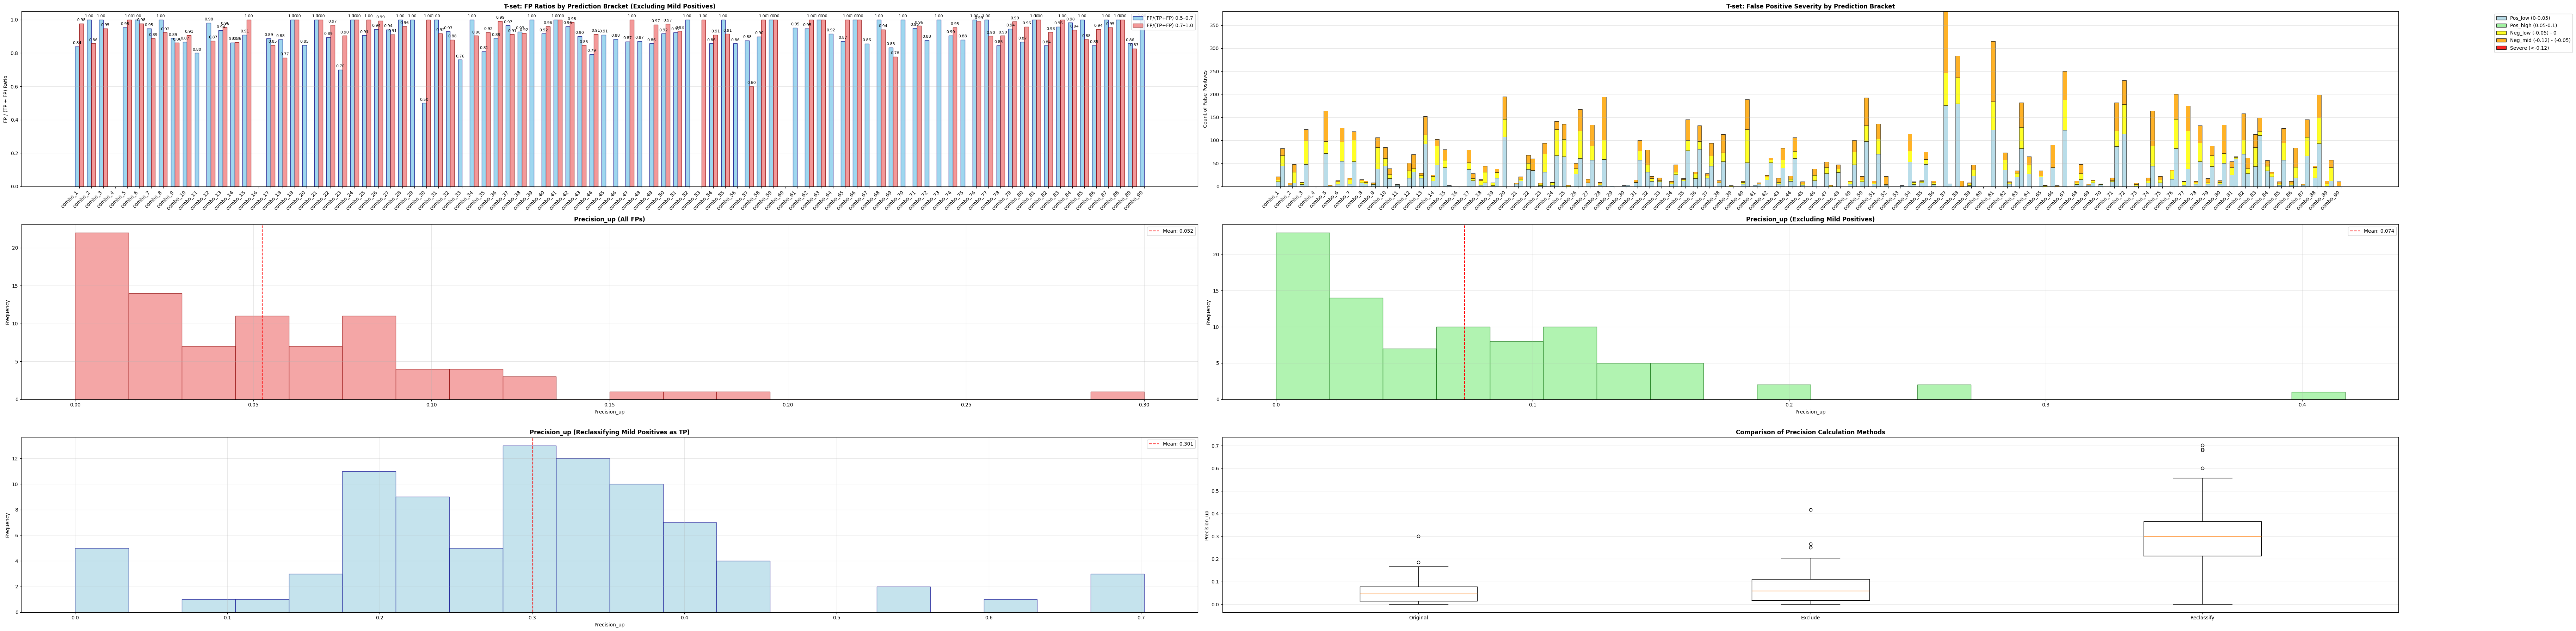

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


selected_models = select_models_by_criteria(
    results_dist_disc,
    mean_precision_range=(0, 100),
    seed_precision_range=(0, 100),
    seed_recall_range=(1, 100),
    min_seeds_per_model=1,
    max_zero_precision_seeds=70,
    min_ratio_difference= None,
    max_ratio_difference=None,
    seed_min_TPminusFP_greaterEqual=None,
    max_FP_severe_ratio_FPs= None,
    max_FP_severe_ratio_FPs_andTPs=None,
    min_FP_severe_ratio_FPs=None,
    min_FP_severe_ratio_FPs_andTPs=None,
    max_seed_severe_FPs_high_bracket=None,
    min_seed_TPs_high_bracket=None,  # NEW: Add the parameter here
    random_seed=42,
    max_models_to_return= len(results_dist_disc)
)


SEVERITY_CATS = [
    "Pos_low (0-0.05)",
    "Pos_high (0.05-0.1)",
    "Neg_low (-0.05) - 0",
    "Neg_mid (-0.12) - (-0.05)",
    "Severe (<-0.12)",
]
SEVERITY_COLORS = {
    "Pos_low (0-0.05)": 'lightblue',
    "Pos_high (0.05-0.1)": 'lightgreen',
    "Neg_low (-0.05) - 0": 'yellow',
    "Neg_mid (-0.12) - (-0.05)": 'orange',
    "Severe (<-0.12)": 'red',
    "Other": 'gray',
}

# --- 1) Build T-set metrics using the helper (no raw loops) ---
tset_keep = recompute_metrics_ignoring_pos_fp(
    selected_models_output=selected_models,
    results_data=results_dist_disc_Tset_same_seeds_organized,
    targets=("pos_low", "pos_high"),
    fp_treatment="keep",          # baseline, count all FPs as-is
)

# tset_keep = recompute_selected_models_on_Tset(results_dist_disc_Tset_same_seeds_organized,
#                                       selected_models,
#                                       brackets=((0.5, 0.7), (0.7, 1.0)))

tset_ignore = recompute_metrics_ignoring_pos_fp(
    selected_models_output=selected_models,
    results_data=results_dist_disc_Tset_same_seeds_organized,
    targets=("pos_high"),
    fp_treatment="ignore",        # drop Pos_low / Pos_high FPs entirely
)
tset_flip = recompute_metrics_ignoring_pos_fp(
    selected_models_output=selected_models,
    results_data=results_dist_disc_Tset_same_seeds_organized,
    targets=("pos_high"),
    fp_treatment="flip_to_tp",    # reclassify Pos_low / Pos_high FPs as TPs
)


######the part below should be a function, stored in the py file to save space

# Import the function from our analytics functions file
from Functions_Analytic_1_Initial_GS_and_Dist_Analytics_HOD import create_severity_fp_analysis_plots

# Call the function with only the plotting logic
create_severity_fp_analysis_plots(
    tset_keep, 
    tset_ignore, 
    tset_flip,
    SEVERITY_CATS,
    SEVERITY_COLORS
)

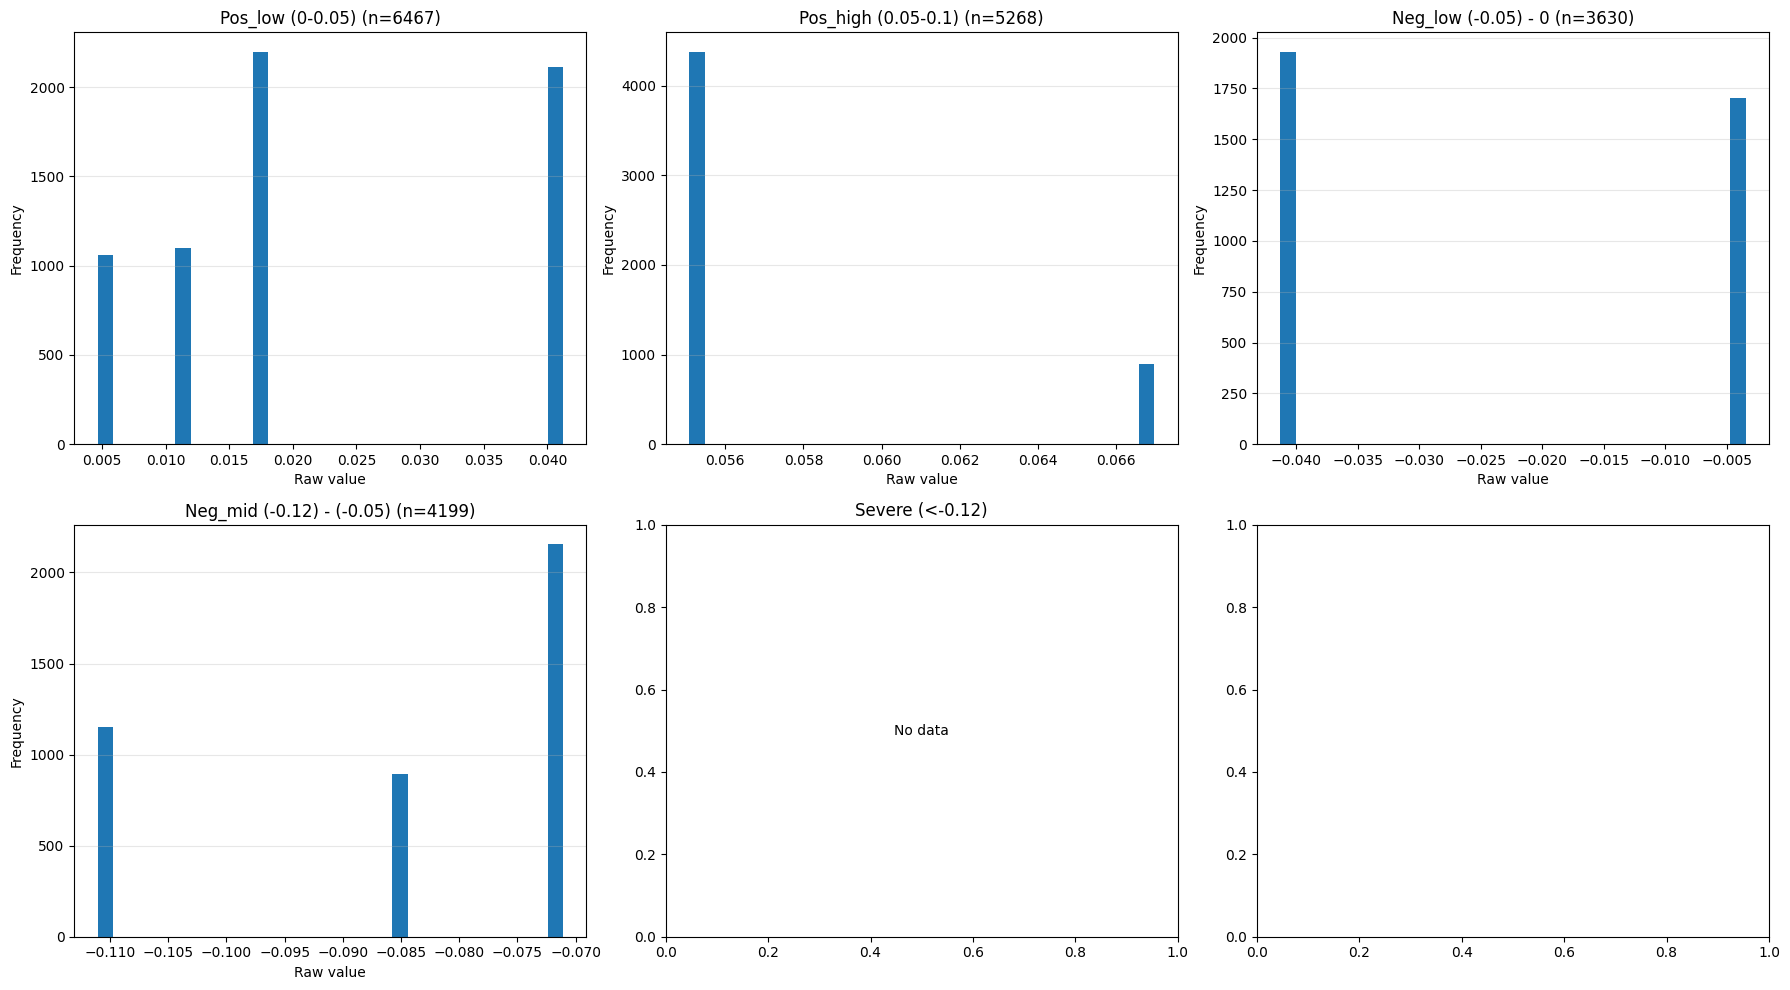

In [ ]:
# --- NEW: Distributions using ONLY tset_keep ---

# 1) Collect FP raw values by severity (collapse across pred brackets)
severity_raws = {cat: [] for cat in SEVERITY_CATS}

for m in tset_keep:
    raw_map = m.get("fp_severity_by_bracket_raw_vals", {})  # {"0.5-0.7": {cat:[...]}, "0.7-1.0": {...}}
    for br_map in raw_map.values():                          # iterate both brackets (if present)
        for cat in SEVERITY_CATS:
            vals = br_map.get(cat, [])
            if vals:
                severity_raws[cat].extend(vals)


# 3) Plot: one histogram per severity + one for TP raws
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
axes2 = axes2.flatten()

# Severities (5 plots)
for i, cat in enumerate(SEVERITY_CATS):
    data = severity_raws[cat]
    ax = axes2[i]
    if data:
        ax.hist(data, bins=30)
        ax.set_title(f"{cat} (n={len(data)})")
        ax.set_xlabel("Raw value"); ax.set_ylabel("Frequency")
        ax.grid(True, alpha=0.3, axis='y')
    else:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_title(cat)


plt.tight_layout()
plt.show()


---
# Testing and Older Funcs 
---